In [1]:

rom sage.plot.scatter_plot import ScatterPlot

In [2]:
var("c, x, y, z, t,j")

(c, x, y, z, t, j)

f and fn defined below are used globally for iteration. The work for both the real and complex numbers.  fn(n, c, z) is f(c, _ ) iterated n-times.

Also define the real fixpoints for c  <= 1/4

In [3]:
def f(c, z):
    return z^2 + c
def fn(n, c, z):
    if n == 0:
        return z
    else:
        return f(c, fn(n-1, c, z))
def pPlus(c):
    return (1/2)*(1+sqrt(1-4*c))
def pMinus(c):
    return (1/2)*(1-sqrt(1-4*c))

In [4]:
f(1, 2)

5

For f(x:Real) = x^2 + c, interactively plot the iterated function from the lower p- fixpoint to the upper fixpoint p+ with the square where interesting dynamics occurs overlaid.  

Intersections with the green diagonal plot of x=y are fixpoints of fn.

*** WARNING: To input c and n from the keyboard, click on the number, edit your value, PRESS ENTER, repeat for the next number (and PRESS ENTER), the click "Run Interact"***

Without pressing enter each time, the widget will use the old values, even though the widget shows the numbers you edited.  You can also change the numbers by sliding, but the widget might snap them to values.

In [5]:
@interact
def one_box(c=-3/4-0.825, n=11, auto_update=False):
    print("c=", c, " n=", n)
    pPlusv = pPlus(c)
    pMinusv = pMinus(c)
    print("p-=", pMinusv, " p+=", pPlusv)
    funp = plot([fn(n, c, t), t], (t, 0 - pPlusv, pPlusv+0), axes_labels=['f','x'], aspect_ratio=1)
    funp = funp + line([[pPlusv,pPlusv], [-pPlusv,pPlusv], 
             [-pPlusv,-pPlusv], [pPlusv, -pPlusv], 
             [pPlusv,pPlusv]], color='red')
    show(funp,figsize=(8,8))


Manual interactive function <function one_box at 0x741eafae68c0> with 2 widgets
  c: FloatSlider(value=-1.575,…

Same as above except most of what's outside the box isn't plotted. When fn(x) is outside the box, x escapes.

*** See instructions and warning about the widget's shortcomings above!***

In [6]:
@interact
def one_box_bounded(c=-3/4-0.825, n=11, auto_update=False):
    print("c=", c, " n=", n)
    pPlusv = pPlus(c)
    pMinusv = pMinus(c)
    print("p-=", pMinusv, " p+=", pPlusv)
    funp = plot(
        [fn(n, c, t), t], (t, 0 - pPlusv, pPlusv+0), ymin=-pPlusv, ymax=pPlusv, 
        axes_labels=['f','x'], aspect_ratio=1)
    funp = funp + line([[pPlusv,pPlusv] ,[-pPlusv,pPlusv], 
                        [-pPlusv,-pPlusv], [pPlusv, -pPlusv], 
                        [pPlusv,pPlusv]], 
                        color='red')
    show(funp,figsize=(8,8))


Manual interactive function <function one_box_bounded at 0x741eac29db40> with 2 widgets
  c: FloatSlider(value…

You can call these functions without the widget.

c= -1/4  n= 6
p-= -1/2*sqrt(2) + 1/2  p+= 1/2*sqrt(2) + 1/2


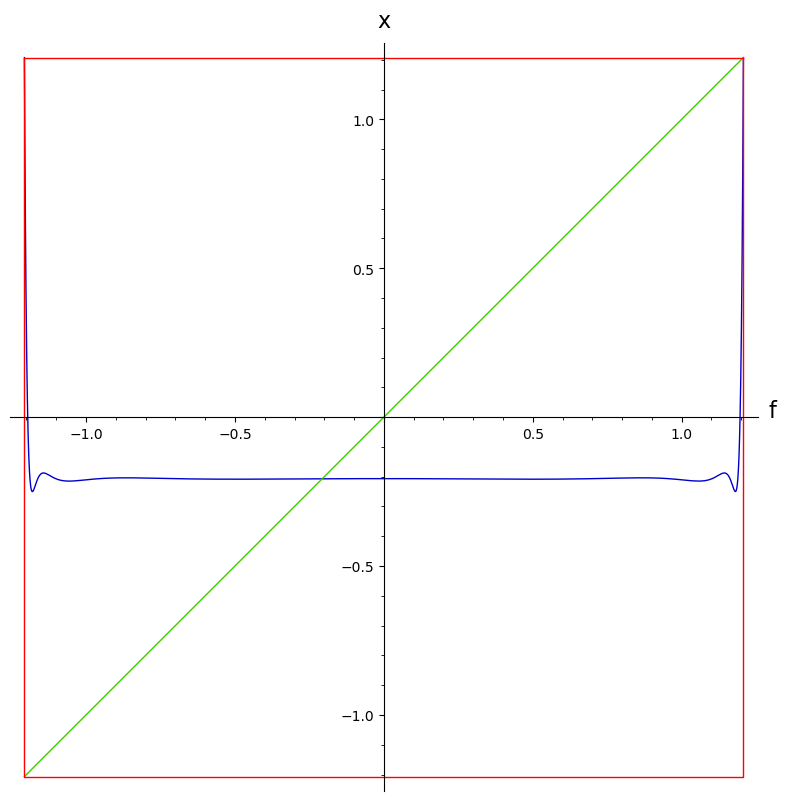

In [7]:
one_box_bounded(-1/4,6)

c= -5/2  n= 6
p-= -1/2*sqrt(11) + 1/2  p+= 1/2*sqrt(11) + 1/2


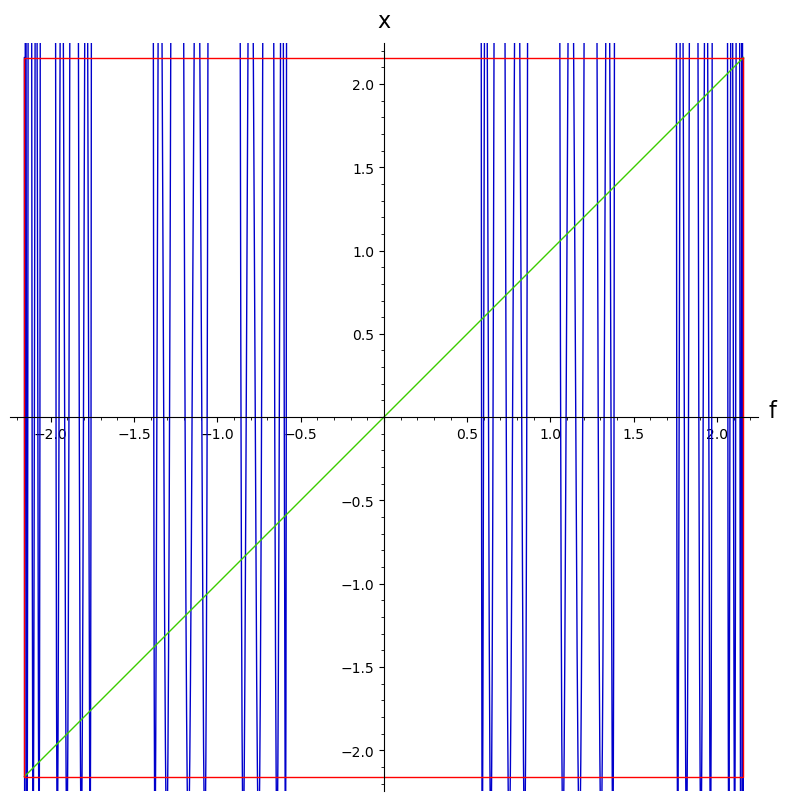

In [8]:
one_box_bounded(-5/2,6)

Symbolic Sage display of iterated f.

In [9]:
z,c = var('z,c')
result = fn(6,c,z)
show(result)

(((((z^2 + c)^2 + c)^2 + c)^2 + c)^2 + c)^2 + c

Here are functions that plot real, one-dimensional orbits in two ways:

* "Orbit diagram" where the diagonal x=y is superposed on the graph of f(c, _) and the orbit is a zig-zag polygon connecting the vertices (x, f(x)), (f(x),f(x)), (ff(x), f(x)), (ff(x),ff(x)), etc. The first evaluated point (x, f(x)) is highlighted in green.  Divergence, one-way and back-and-forth convergence to a fixpoint, convergence to a cycle, one cycle, and post critically finite (PCF, aka pre-periodic or eventually periodic) orbits are easily observed. 

* Plot of f^(n)(x) as a function of n=0, 1, ..., N-1.  Besides displaying convergence, the length of a cycle is easily observed.

A message is printed and plot extension stops when a fixpoint is detected.

{'aspect_ratio': 2}
about to plot f from/to  -2.24990250662492 2.24981251512462


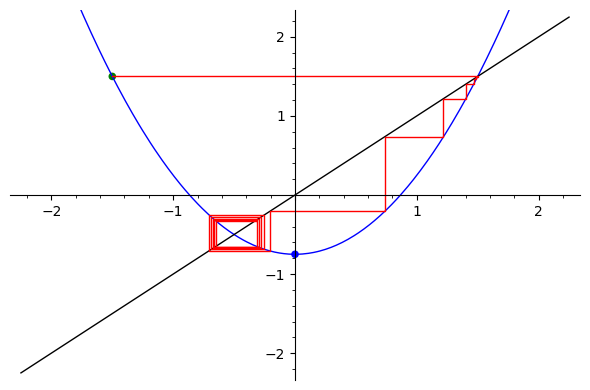

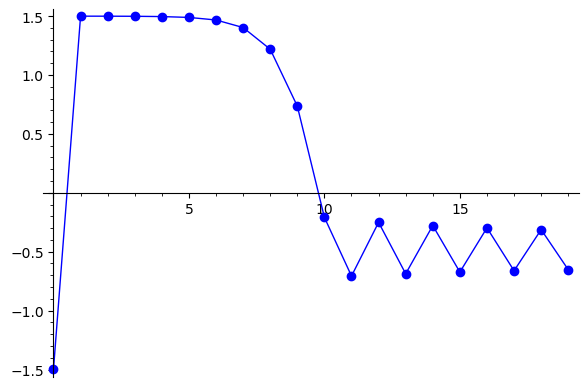

In [10]:

def plot_iteration(f, c, N, x, **kwargs):
    
    x0 = x
    
    mins = x
    maxs = x

    print(kwargs)
    
    zigzag = []
    for k in range(N):
        y = f(c, x)
        mins = min(mins, y)
        maxs = max(maxs, y)
        zigzag.append([x, y])
        if x == y:
           print("Fixed point", x, " after ", k+1, " steps.")
           break
        zigzag.append([y, y])
        x = y
    
    bufw = max( (maxs-mins)*(0.25), 0.000000001 )
    mins = mins-bufw
    maxs = maxs+bufw
    
    
    
#    p1 = plot(kwargs)
    idline = line([[mins,mins], [maxs, maxs]], color='black')
    print("about to plot f from/to ", mins, maxs)
    p1 = plot(f(c, t), (t, mins, maxs), xmin=mins, xmax=maxs, ymin=mins, ymax=maxs)
    p1 = p1 + idline 
    p1 = p1 + line(zigzag,  color='red')
    p1 = p1 + list_plot([[x0,f(c,x0)]],  color='green', size=30)
    p1 = p1 + list_plot([[0,c]],  color='blue', size=30)
    plist = [zigzag[2*k][0] for k in range(int(len(zigzag)/2))]
    p2 = list_plot(plist, plotjoined=True, marker="o")
   
    return(p1,p2)

p1, p2 = plot_iteration(f, -3/4+0.00001, 20,  (-3/4+0.0000249985)*2, aspect_ratio=2)
show(p1)
show(p2)

In [11]:
def plot_iteration_box(f, c, N, x, **kwargs):
    
    if c > 1/4:
        print("No fixed points. All orbits escape. Goodbye")
        return
    
    pPlusv = pPlus(c)
    
    print("c= ", c, "x= ", x)
    
    print("p+ = ", pPlusv)
    
    p1 = line([[pPlusv,pPlusv] ,[-pPlusv,pPlusv], 
               [-pPlusv,-pPlusv], [pPlusv, -pPlusv], [pPlusv,pPlusv]], 
              color='red', aspect_ratio=1)
    
    x0 = x
    
    mins = x
    maxs = x
    
    zigzag = []
    for k in range(N):
        y = f(c, x)
        mins = min(mins, y)
        maxs = max(maxs, y)
        zigzag.append([x, y])
        if x == y:
           print("Fixed point", x, " after ", k+1, " steps.")
           break
        zigzag.append([y, y])
        x = y
    
    bufw = max( (maxs-mins)*(0.25), 0.000000001 )
    mins = mins-bufw
    mins = min(mins,-pPlusv)
    maxs = maxs+bufw
    maxs = max(maxs,pPlusv)
    
    p1 = p1 + line([[mins,mins], [maxs, maxs]], color='black')
    print("about to plot f from/to ", mins, maxs)
    p1 = p1 + plot(f(c, t), (t, mins, maxs), xmin=mins, xmax=maxs, ymin=mins, ymax=maxs, aspect_ratio=1)
    idline = line([[mins,mins], [maxs, maxs]], color='black')
    p1 = p1 + idline 
    p1 = p1 + line(zigzag,  color='red')
    p1 = p1 + list_plot([[x0,f(c,x0)]],  color='green', size=30)
    p1 = p1 + list_plot([[0,c]],  color='blue', size=30)

    plist = [zigzag[2*k][0] for k in range(int(len(zigzag)/2))]
    p2 = list_plot(plist, plotjoined=True, marker="o")
    
    diffs = ([kkk, plist[-1]-plist[-(kkk)-1]] for kkk in range(min(200,len(plist))))
    #print( [ [d[0], log( max(0.000000001, abs(d[1]) ) )] for d in diffs]  )
    #show(scatter_plot([ [d[0], log(abs(d[1]))] for d in diffs]))
    #for pp in diffs:
    #    print(pp)
   
    return(p1,p2)
@interact
def pib( c=(-2.0,0.25), N=(0,1000), x=(-2.0,0.250), auto_update=False):
    p1, p2 =plot_iteration_box(f,c,N,x,aspect_ratio=2)
#p1, p2 = plot_iteration_box(f, -3/4+0.00001, 20,  (-3/4+0.0000249985)*2, aspect_ratio=2)
    show(p1)
    show(p2)

Manual interactive function <function pib at 0x741ea2d0fa30> with 3 widgets
  c: FloatSlider(value=-0.875, des…

c=  0.250000000000000 x=  0
p+ =  0.500000000000000
about to plot f from/to  -0.500000000000000 0.597573431864071


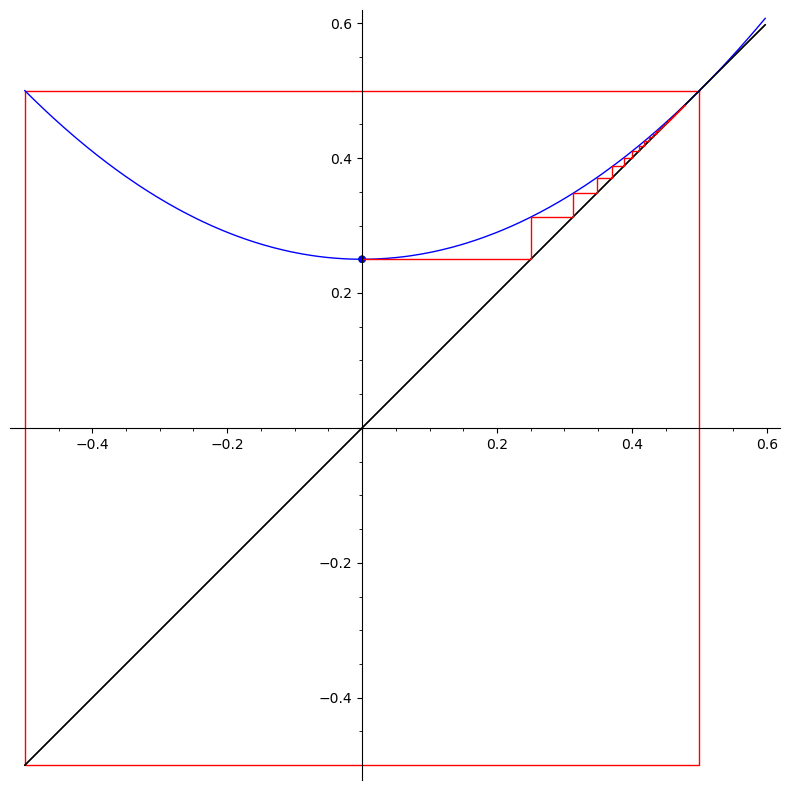

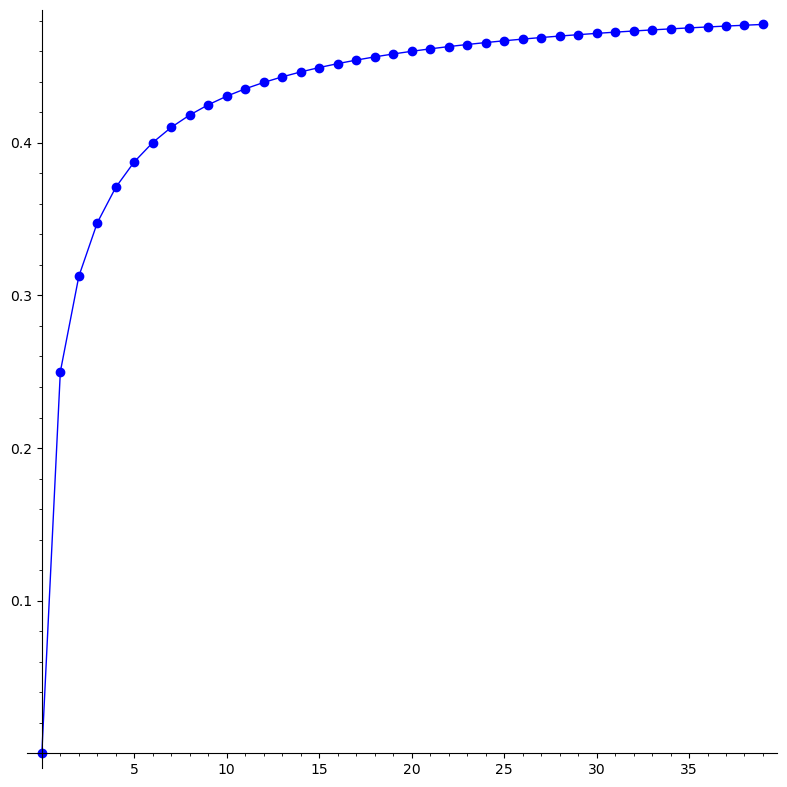

In [12]:
p1, p2 = plot_iteration_box(f,0.25,40,0)
show(p1, figsize=(8,8))
show(p2, figsize=(8,8))

c=  -1.77500000000000 x=  0
p+ =  1.92302494707577
about to plot f from/to  -2.56265625000000 2.16328125000000


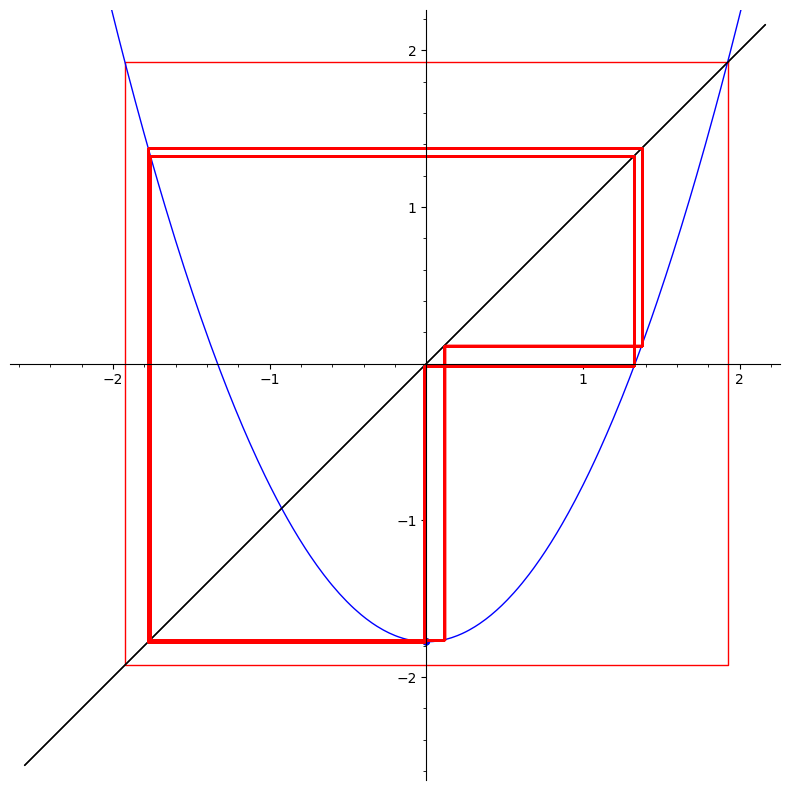

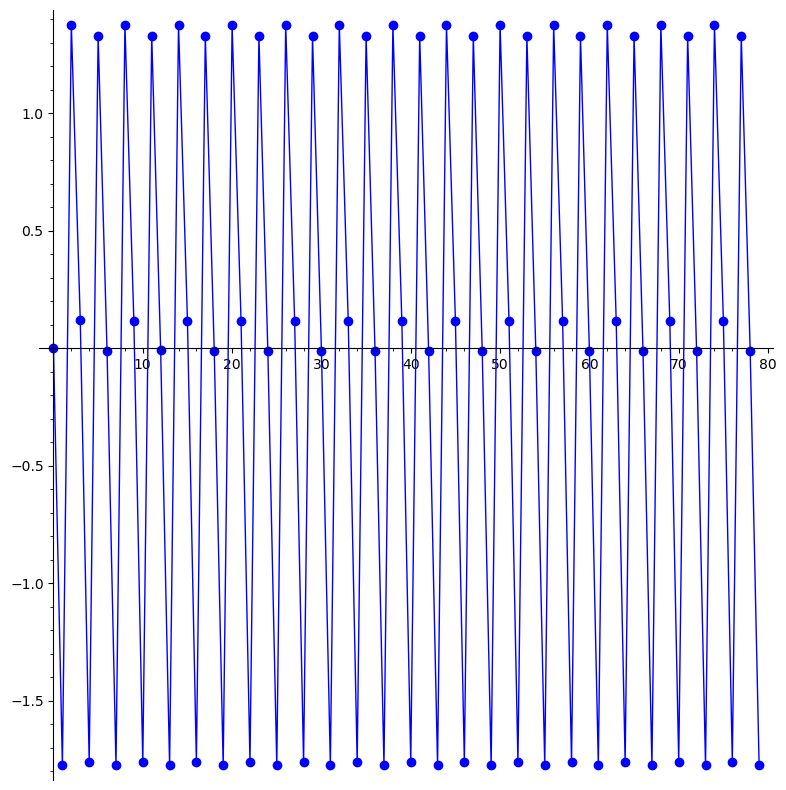

In [13]:
p1, p2 = plot_iteration_box(f, -1.775, 80, 0)
show(p1,figsize=(8,8))
show(p2,figsize=(8,8))

c=  -1.31000000000000 x=  0
p+ =  1.74899959967968
about to plot f from/to  -1.74899959967968 1.74899959967968


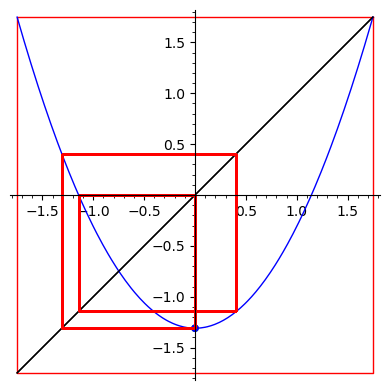

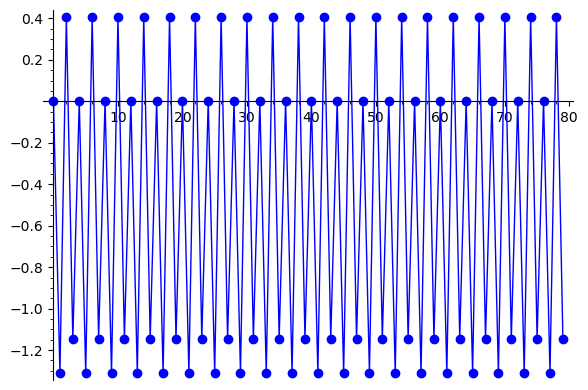

In [14]:
p1, p2 = plot_iteration_box(f, -1.31, 80, 0, aspect_ratio=2)
show(p1)
show(p2)

We compare y=f_c(x) (black) and f_c^(2) (blue) over the domain [-p+, p+] for selected values of c.

c= 0.25


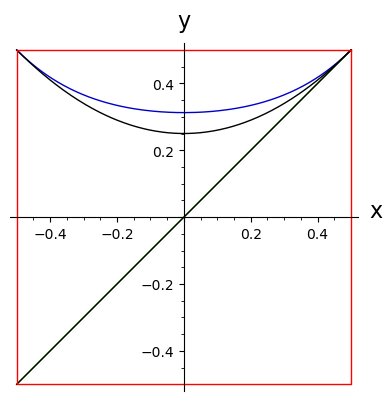

c= 0.125


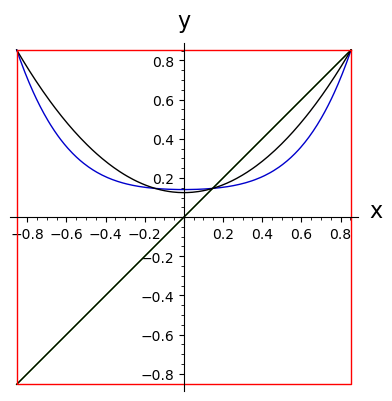

c= 0.0


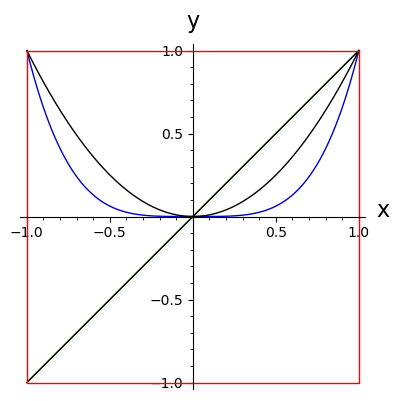

c= -0.25


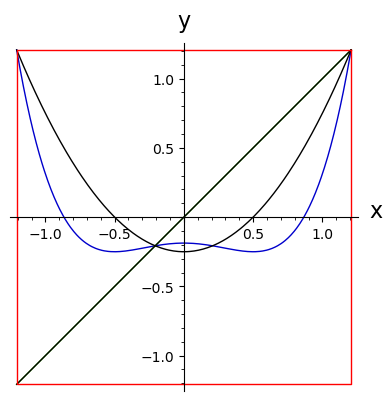

c= -0.5


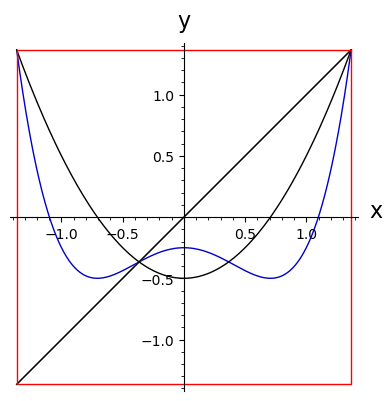

c= -0.75


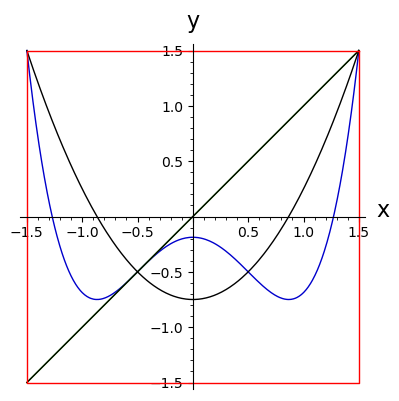

c= -1.0


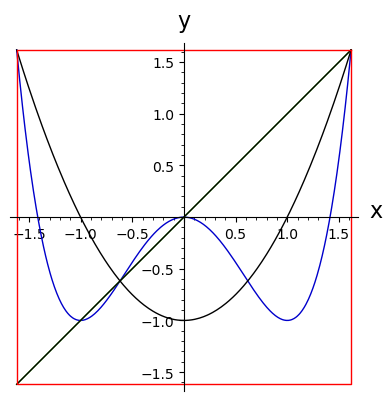

c= -1.25


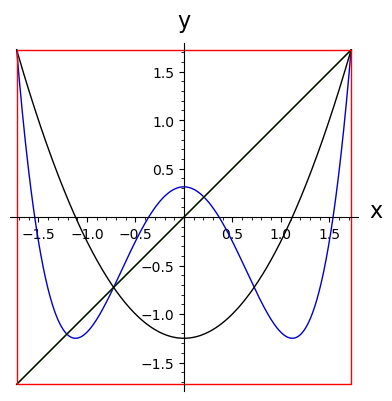

c= -1.5


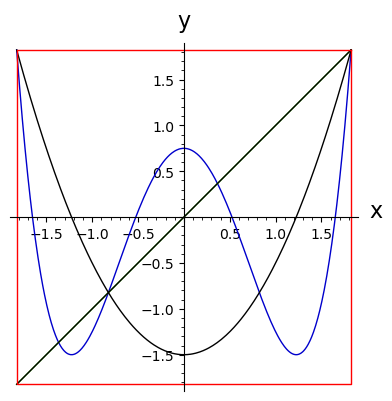

c= -2.0


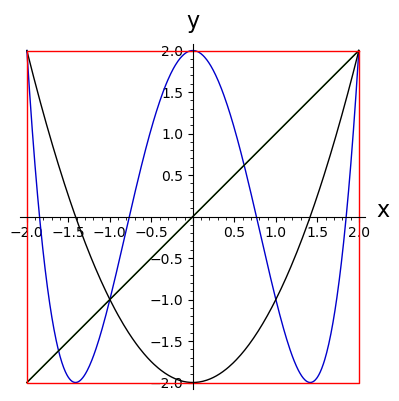

c= -2.5


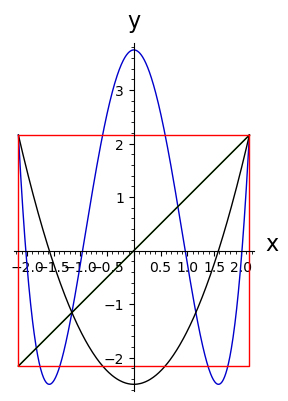

c= -3.0


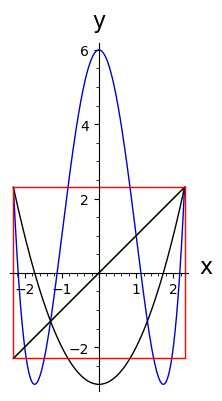

c= -4.0


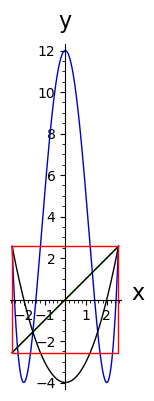

c= -5.0


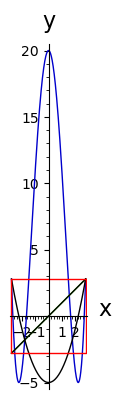

c= -10.0


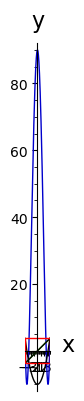

c= -20.0


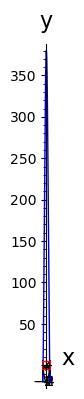

In [15]:
def boxview():
    for c in [1/4, 1/8, 0, -1/4, -1/2, -3/4, -1, -5/4, -3/2, -2, -2.5, -3, -4, -5,- 10,-20]:

        pPlusv = pPlus(c)
        pMinusv = pMinus(c)
        
        funp = plot(
            [fn(2, c, t), t], (t, 0.0 - pPlusv, pPlusv+0), axes_labels=['x', 'y'], 
            aspect_ratio=1)
        
        funp = funp + plot(
            [fn(1, c, t), t], (t, 0.0 - pPlusv, pPlusv+0), axes_labels=['x', 'y'],
            aspect_ratio=1, color='black')
        
        funp = funp + line(
            [[pPlusv,pPlusv] ,[-pPlusv,pPlusv], [-pPlusv,-pPlusv], [pPlusv, -pPlusv], 
             [pPlusv,pPlusv]], color='red')
        
        print("c=", float(c))
        show(funp)
        
boxview()

In [16]:
def plot_show(f, c, n, x):
    p1, p2 = plot_iteration_box(f, c, n, x)
    show(p1)
    show(p2)

c=  -1.50000000000000 x=  0
p+ =  1.82287565553230
about to plot f from/to  -2.06250000000000 1.82287565553230


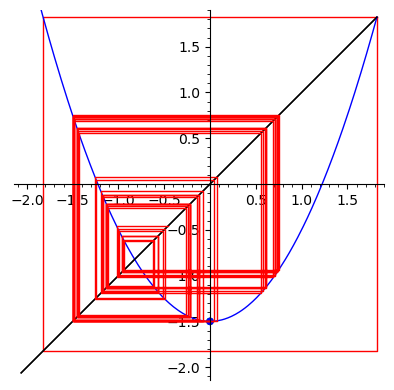

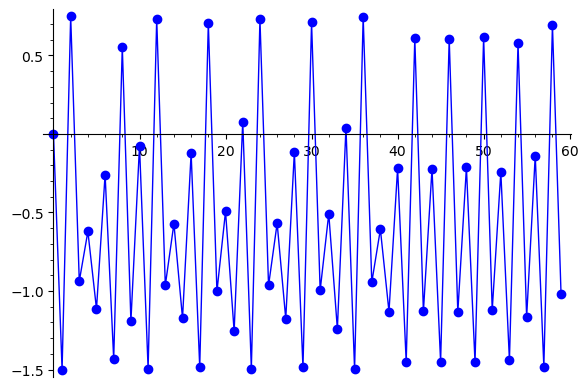

In [17]:
plot_show(f, -1.5, 60, 0)

c=  -0.950000000000000 x=  0
p+ =  1.59544511501033
about to plot f from/to  -1.59544511501033 1.59544511501033


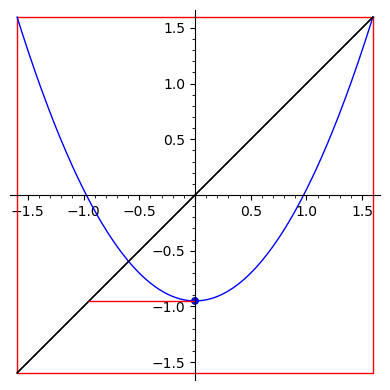

In [18]:
p1, p2 = plot_iteration_box(f, -3/4-0.2, 1, 0)
show(p1)

c=  -0.950000000000000 x=  -0.580000000000000
p+ =  1.59544511501033
about to plot f from/to  -1.59544511501033 1.59544511501033


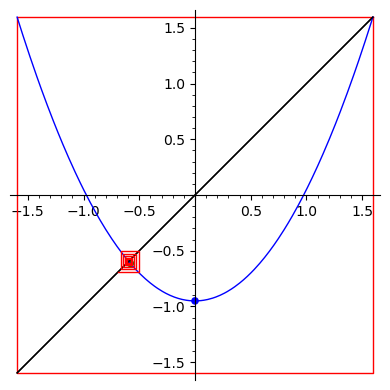

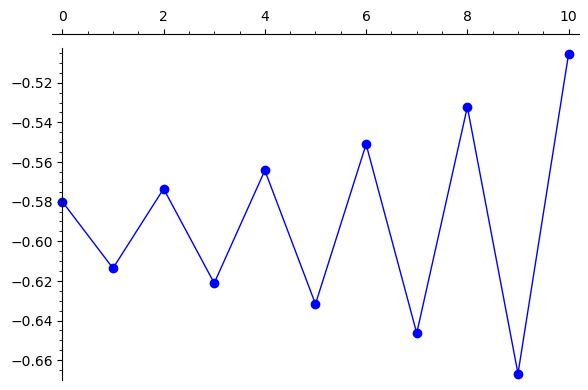

In [19]:
plot_show(f,-3/4-0.2,11,-0.58)

c=  -3/4 x=  -3/2
p+ =  3/2
Fixed point 3/2  after  2  steps.
about to plot f from/to  -2.25000000000000 2.25000000000000


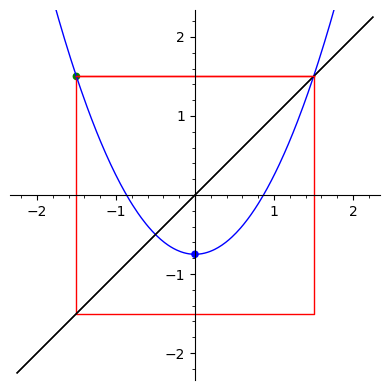

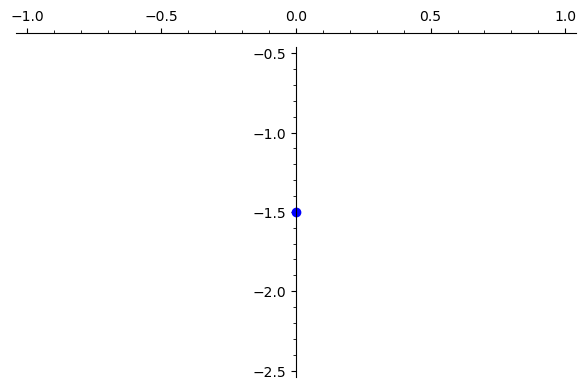

In [20]:
plot_show(f, -3/4, 3, (-3/4)*2)

c=  -0.550000000000000 x=  -1.39442000000000
p+ =  1.39442719099992
about to plot f from/to  -2.09162678410000 2.09161392050000


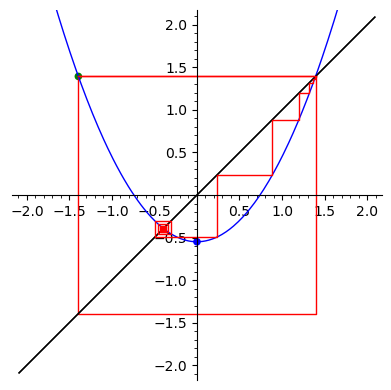

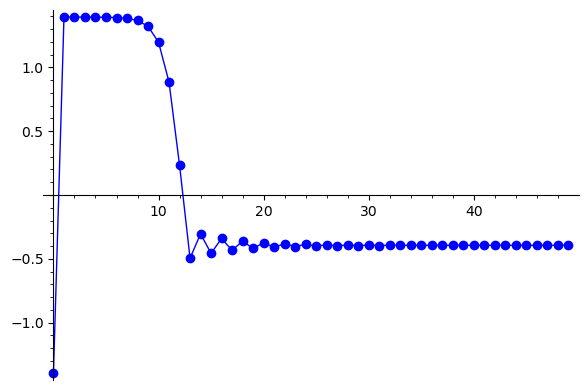

In [21]:
plot_show(f,-3/4+0.2,50, -3/2+0.10558)

c=  0.0100000000000000 x=  0
p+ =  0.989897948556636
Fixed point 0.0101020514433644  after  11  steps.
about to plot f from/to  -0.989897948556636 0.989897948556636


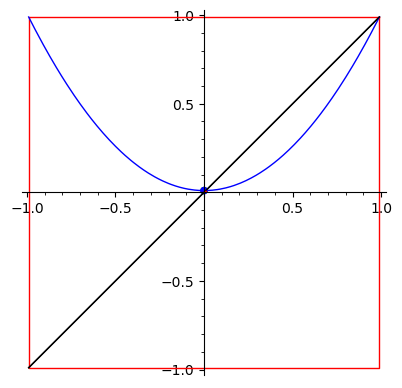

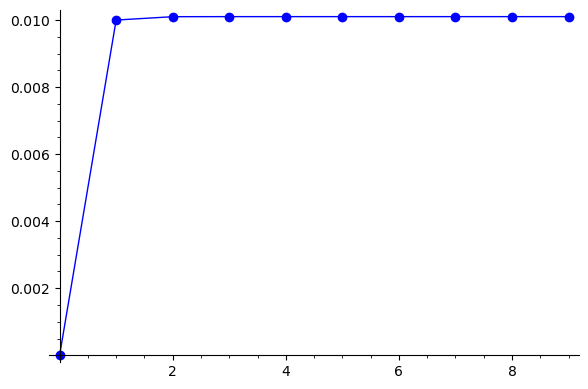

In [22]:
plot_show(f, 0.01, 20, 0)

c=  -3/4 x=  -1.49900000000000
p+ =  3/2
about to plot f from/to  -2.24800025000000 2.24600125000000


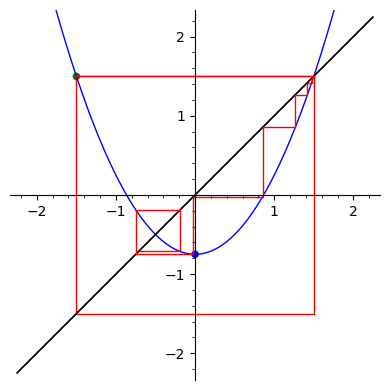

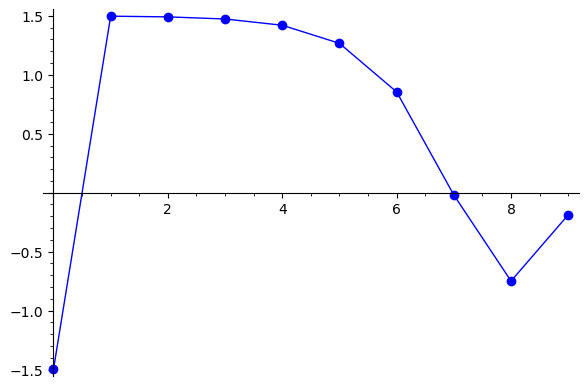

In [23]:
plot_show(f, -3/4, 10,  (-3/4)*2+0.001)

c=  -0.749000000000000 x=  -1.49900000000000
p+ =  1.49949987493746
about to plot f from/to  -2.24825025000000 2.24725125000000


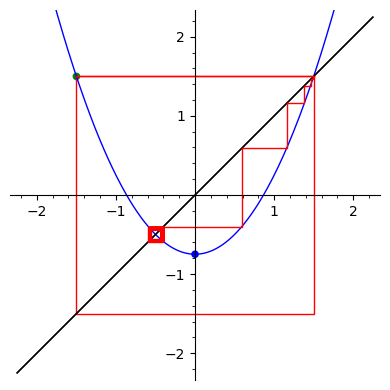

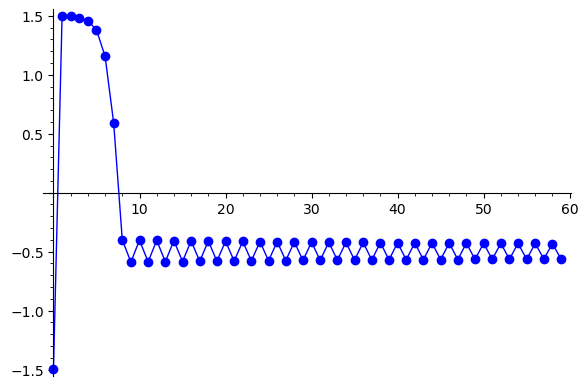

In [24]:
plot_show(f, -3/4+0.001, 60,  (-3/4)*2+0.001)

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
about to plot f from/to  -2.28404838601738 2.42324268046214


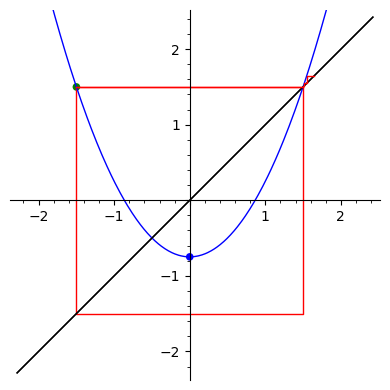

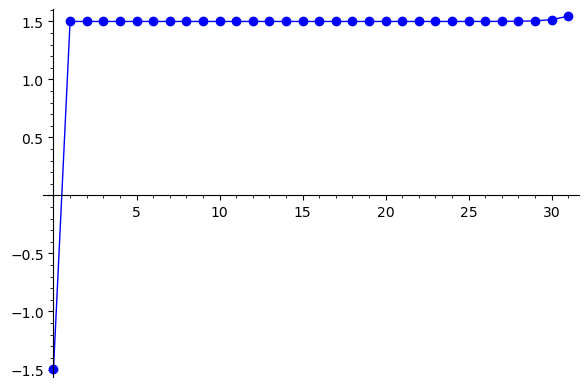

In [25]:
plot_show(f, -3/4+0.001, 32,  (-3/4)*2+0.00050012506253904)

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
about to plot f from/to  -2.24924981240619 2.24924981240619


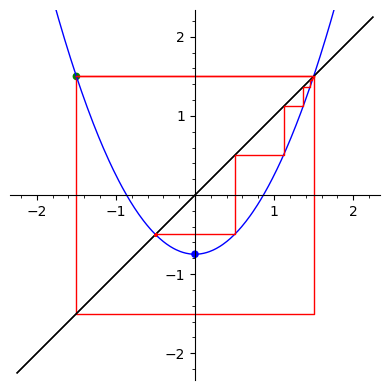

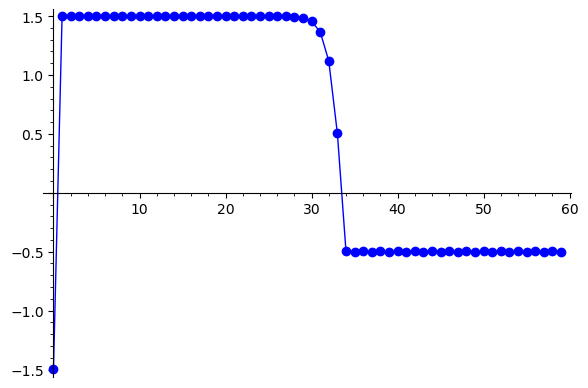

In [26]:
plot_show(f, -3/4+0.001, 60,  (-3/4)*2+0.00050012506253905)

In [27]:
(1/2)*(1+2*sqrt(0.999))-(3/2)

-0.000500125062539158

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
about to plot f from/to  -2.24924981240619 2.24924981240619


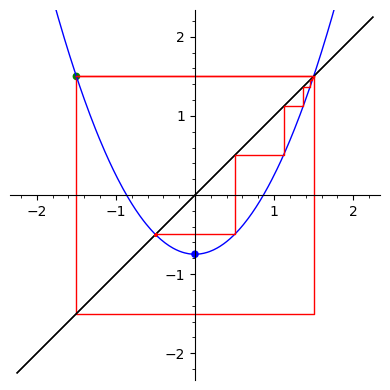

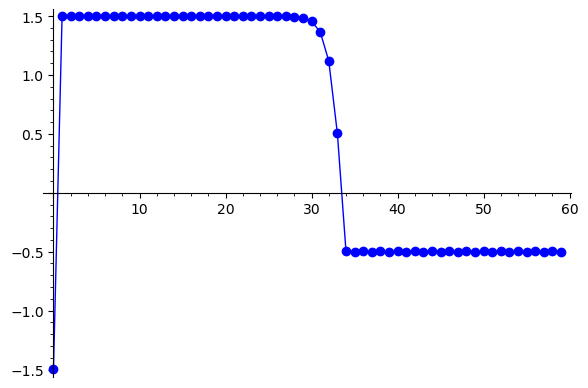

In [28]:
plot_show(f, -3/4+0.001, 60,  (-3/4)*2+0.00050012506253905)

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
about to plot f from/to  -2.24924981240619 2.24924981240619


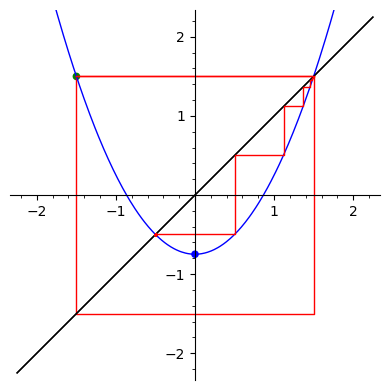

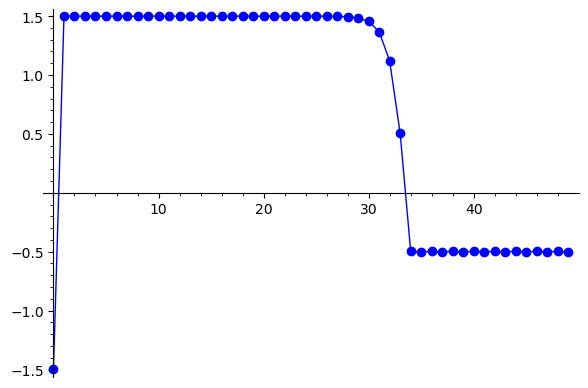

In [29]:
plot_show(f, -3/4+0.001, 50,  (-3/4)*2-(1/2)*(1+2*sqrt(0.999))+(3/2))

c=  -0.850000000000000 x=  -0.100000000000000
p+ =  1.54880884817015
about to plot f from/to  -1.54880884817015 1.54880884817015


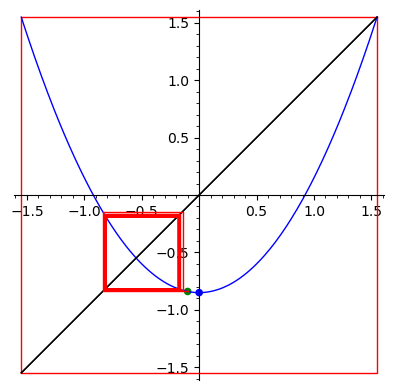

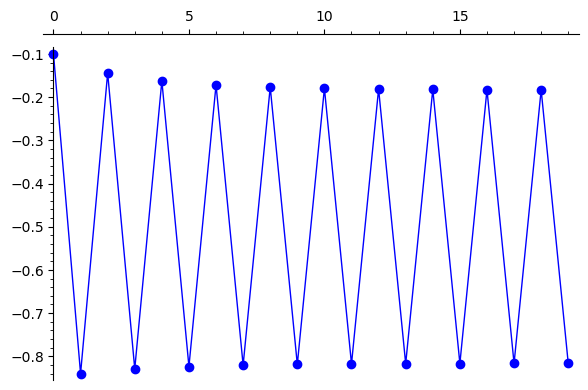

In [30]:
plot_show(f, -3/4 - 0.1, 20, -0.1)

c=  -0.850000000000000 x=  -0.300000000000000
p+ =  1.54880884817015
about to plot f from/to  -1.54880884817015 1.54880884817015


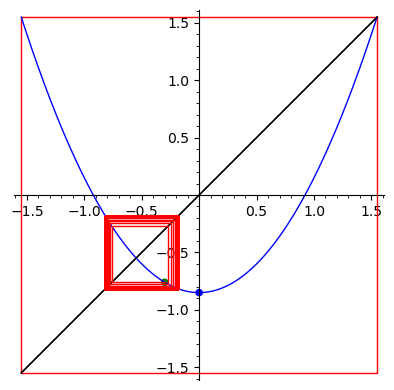

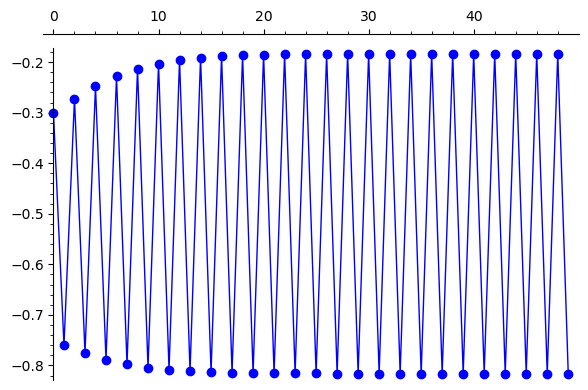

In [31]:
plot_show(f, -3/4 - 0.1, 50, -0.3)

c=  -1.90000000000000 x=  0
p+ =  1.96628782986152
about to plot f from/to  -2.80250000000000 2.61250000000000
c=  -1.10000000000000 x=  0
p+ =  1.66189500386223
about to plot f from/to  -1.66189500386223 1.66189500386223


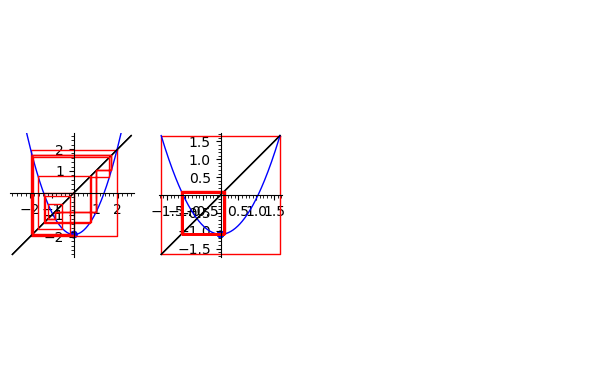

In [32]:
one = plot_iteration_box(f, -2.0+0.1, 20, 0)
two = plot_iteration_box(f, -1.0-0.1, 20, 0)
show(one[0], two[0])


I wrote this to explore convergence.

about to plot f from/to  -1.50010000000000 0.500100010000000


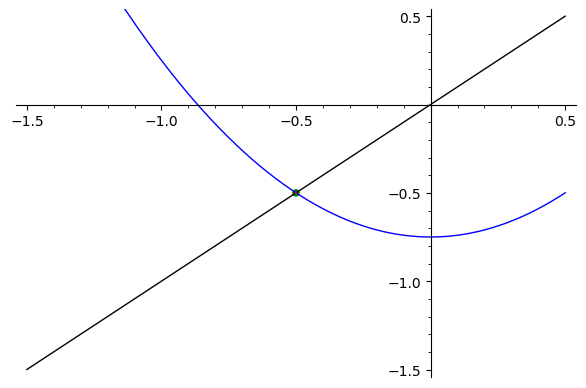

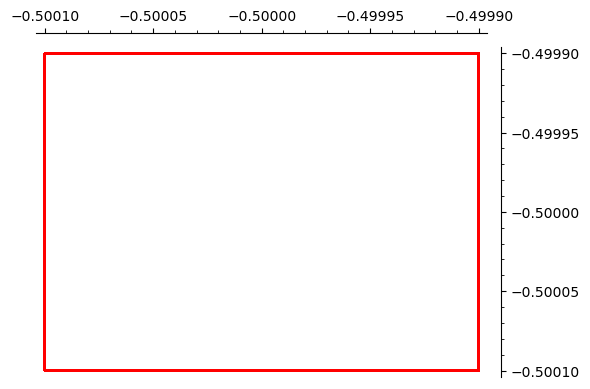

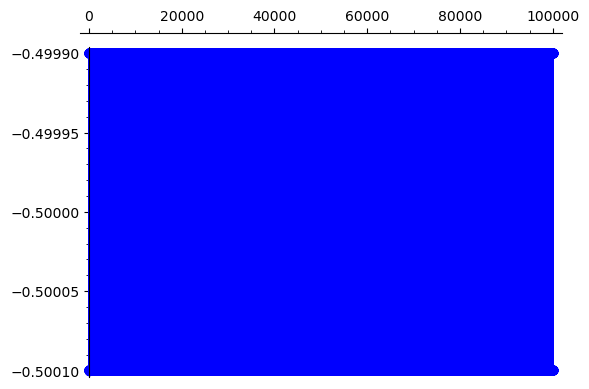

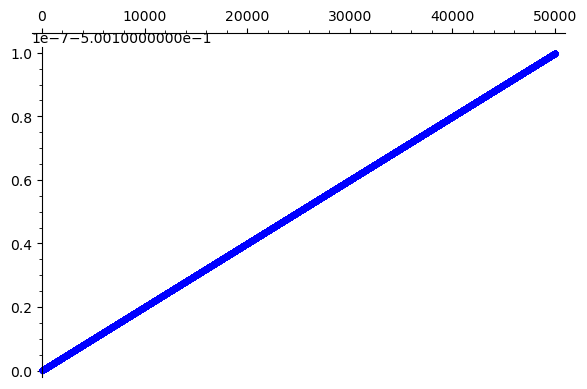

In [33]:

def plot_iteration2(f, c, N, x):
    
    x0 = x
    
    mins = x
    maxs = x


    zigzag = [[x, x]]
    for k in range(N):
        y = f(c, x)
        mins = min(mins, y)
        maxs = max(maxs, y)
        if x == y:
            print("Fixed point", x)
            print(zigzag)
            break
        zigzag.append([x, y])
        zigzag.append([y, y])
        x = y
    
    bufw = max( (maxs-mins)*(0.25), 1 )
    mins = mins-bufw
    maxs = maxs+bufw
    
    
    
    
    idline = line([[mins,mins], [maxs, maxs]], color='black')
    print("about to plot f from/to ", mins, maxs)
    p1 = plot(f(c, t), (t, mins, maxs), xmin=mins, xmax=maxs, ymin=mins, ymax=maxs)
    p1 = p1 + idline 
    p1 = p1 + line(zigzag, color='red')
    p1 = p1 + line(zigzag, color='red')
    p1 = p1 + list_plot([[x0,x0]], color='green', size=30)
    p15 = line(zigzag, color='red')
    plist = [zigzag[2*k][0] for k in range(N)]
    plist2 = [zigzag[4*k][0] for k in range(N/2)]
    p2 = list_plot(plist, plotjoined=True, marker="o")
    p3 = list_plot(plist2, plotjoined=True, marker=".")
   
    return(p1, p15, p2,p3)

p1, p15, p2, p3 = plot_iteration2(f, -3/4, 100000, -1+0.5-0.0001)
show(p1)
show(p15)
show(p2)
show(p3)

**Now we work in Complex numbers**

In [34]:
DetectEscapeBound = 10.0

In [35]:
def complex_orbit(c, N, z=0, lastN=20, printing=False):

    z_init = z  #save for printing and plotting.
    
    print("c=", c, "N=", N, "lastN(red)=", lastN)
    
    if z == 0:
        print("Critical orbit (start=0)")
    else:
        print(" orbit beginning=", z)

    ps = []  # to hold the orbit.
    for k in range(N):
        if(printing):
            print(k, z)
        ps.append([z.real(), z.imag()])
        z = f(c,z)
        if abs(z) > DetectEscapeBound:
            print("\033[31;1;4mEscaping!\033[0m Stop Iteration=", k, " z=", z)
            break
    #print(ps)
    
    #Plot the orbit with (default color) blue lines connecting black dots at orbit points.
    # aspect_ratio=1 forces the x and y scales to be equal.
    plot = line(ps, aspect_ratio=1, marker=".", markeredgecolor="black", markersize=2,thickness=0.25)
    
    #Overlay the lastN-1 blue lines with red lines, to show any attracting or eventual cycle
    # if the number of iterations is large enough.
    plot = plot + line(ps[-min(lastN,len(ps)):], aspect_ratio=1, color='red')
    
    
    # When we're plotting the critical orbit, show the line from the critical point to (c, f_c(c)) in green.
    if z_init == 0:
        plot = plot +line(ps[0:2], color='green',thickness=2)
    
    show(plot)
    return plot

c= -1.05990000000000 + 0.245000000000000*I N= 10000 lastN(red)= 10
Critical orbit (start=0)


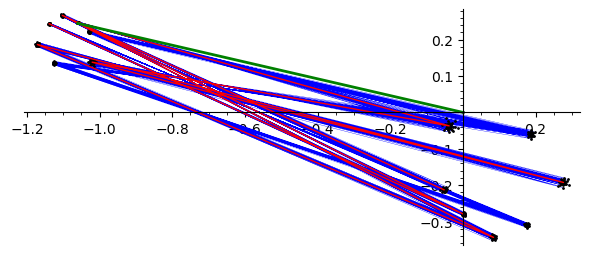

c= -1.05990000000000 + 0.242500000000000*I N= 10000 lastN(red)= 10
Critical orbit (start=0)


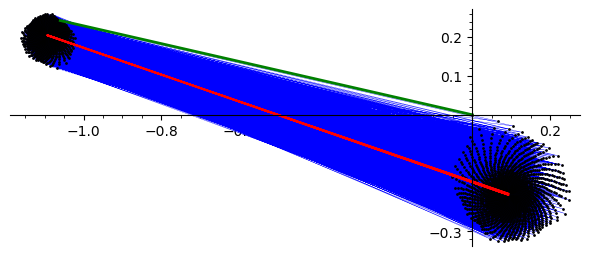

c= -1.05990000000000 + 0.240000000000000*I N= 2000 lastN(red)= 10
Critical orbit (start=0)


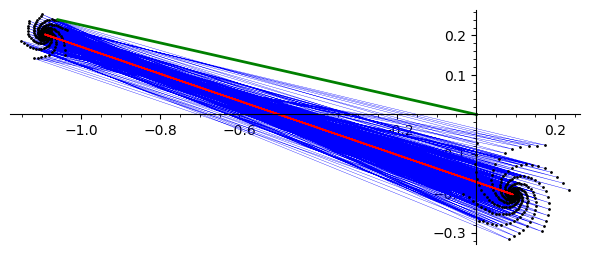

In [36]:
complex_orbit(-1.0599+0.2450*I, 10000, lastN=10)
complex_orbit(-1.0599+0.2425*I, 10000, lastN=10)
complex_orbit(-1.0599+0.2400*I, 2000, lastN=10)
pass #so we dont show the last plot twice

c= -0.483400000000000 + 0.542000000000000*I N= 20 lastN(red)= 11
Critical orbit (start=0)


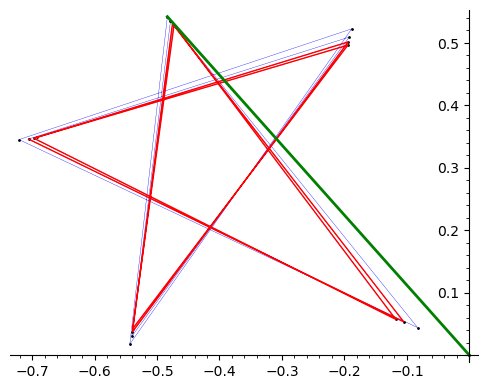

In [37]:
complex_orbit(-0.4834+0.542*I, 20, lastN=11)
pass

c= -1.75000000000000 + 0.0112500000000000*I N= 2000 lastN(red)= 10
Critical orbit (start=0)


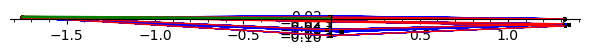

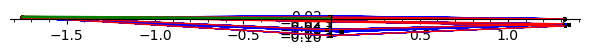

In [38]:
complex_orbit(-1.75+0.01125*I, 2000, lastN=10)

That action is squashed near the real axis.  The function below uses the "auto" aspect_ratio param so the real and imaginary axis scales are different to avoid squashed display.

In [39]:
def complex_orbit_arbaspect(c, N, z=0, lastN=20, lastcolor='red', printing=False):

    z_init = z
    
    print("c=", c, "N=", N, "lastN(red)=", lastN)
    
    if z == 0:
        print("Critical orbit (start=0)")
    else:
        print(" orbit beginning=", z)


    ps = []
    for k in range(N):
        if printing:
            print(k, z)
        ps.append([z.real(), z.imag()])
        z = f(c,z)
        if abs(z) > DetectEscapeBound:
            print("\033[31;1;4mEscaping!\033[0m Stop Iteration=", k, " z=", z)
            break
    #print(ps)
    plot = line(ps, marker=".", markeredgecolor="black", markersize=2,thickness=0.25)
    plot = plot + line(ps[-min(lastN,len(ps)):], color=lastcolor) 
    plot = plot +line(ps[0:2], color='green',thickness=2)
    show(plot)
    return plot

c= -1.75000000000000 + 0.0112500000000000*I N= 2000 lastN(red)= 10
Critical orbit (start=0)


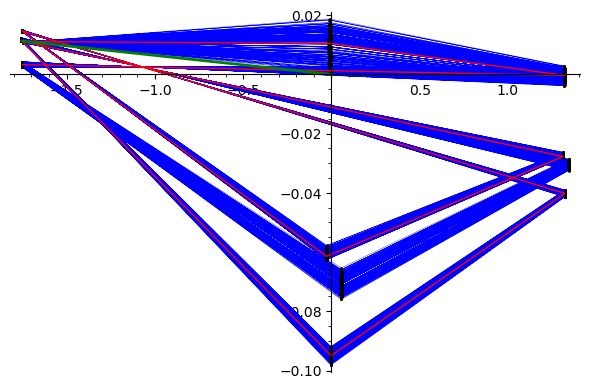

In [40]:
complex_orbit_arbaspect(-1.75+0.01125*I, 2000, lastN=10)
pass

c= -0.927600000000000 + 0.231900000000000*I N= 3 lastN(red)= 20
Critical orbit (start=0)


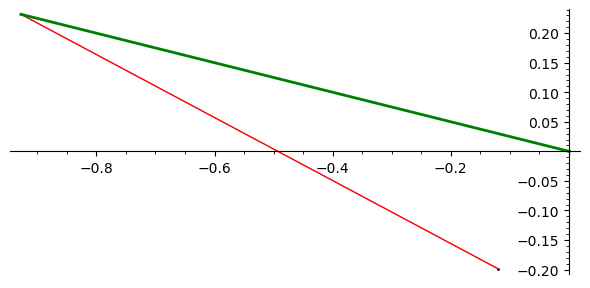

c= -0.927600000000000 + 0.231900000000000*I N= 23 lastN(red)= 20
Critical orbit (start=0)


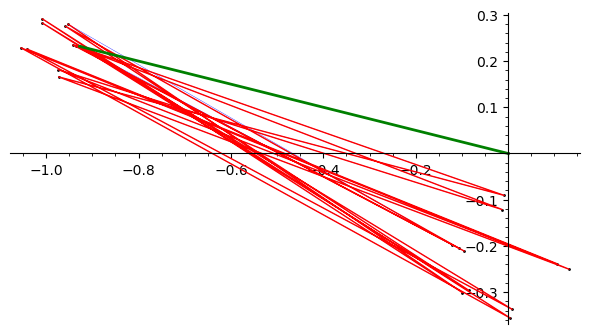

c= -0.927600000000000 + 0.231900000000000*I N= 43 lastN(red)= 20
Critical orbit (start=0)


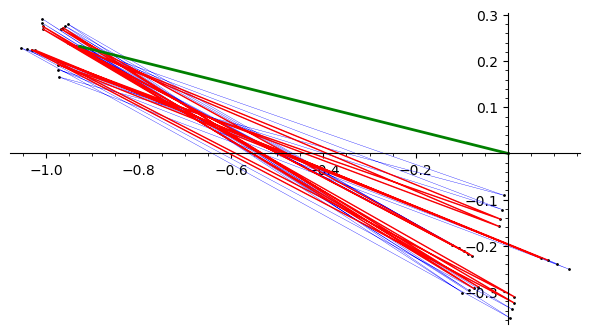

c= -0.927600000000000 + 0.231900000000000*I N= 63 lastN(red)= 20
Critical orbit (start=0)


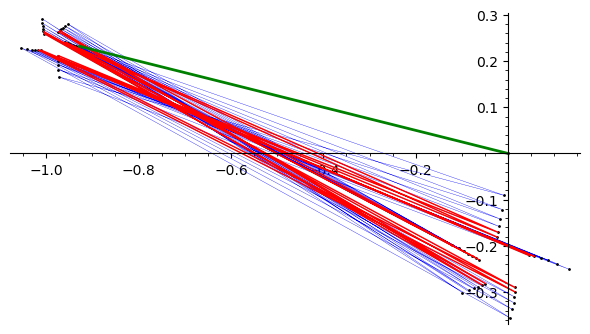

c= -0.927600000000000 + 0.231900000000000*I N= 83 lastN(red)= 20
Critical orbit (start=0)


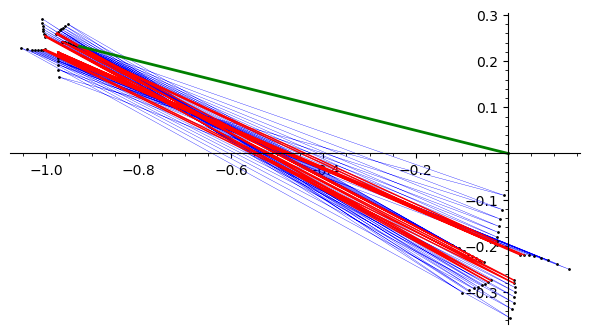

c= -0.927600000000000 + 0.231900000000000*I N= 103 lastN(red)= 20
Critical orbit (start=0)


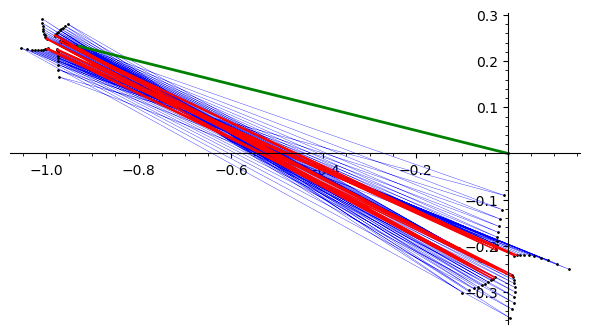

c= -0.927600000000000 + 0.231900000000000*I N= 123 lastN(red)= 20
Critical orbit (start=0)


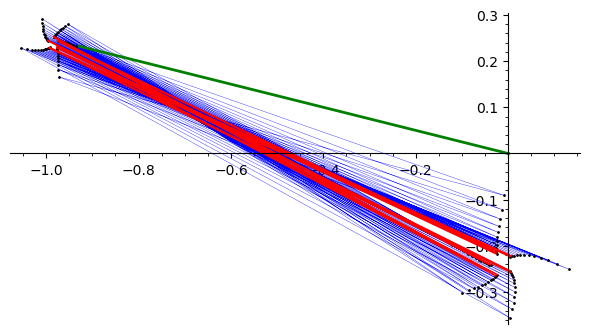

c= -0.927600000000000 + 0.231900000000000*I N= 143 lastN(red)= 20
Critical orbit (start=0)


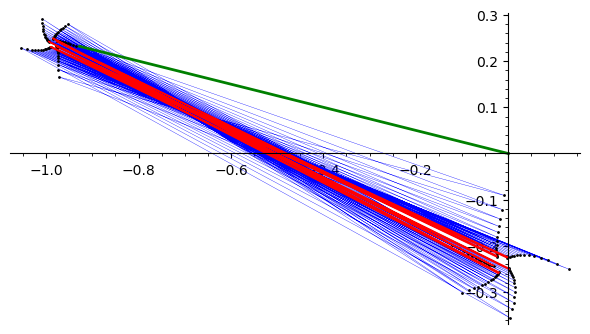

c= -0.927600000000000 + 0.231900000000000*I N= 163 lastN(red)= 20
Critical orbit (start=0)


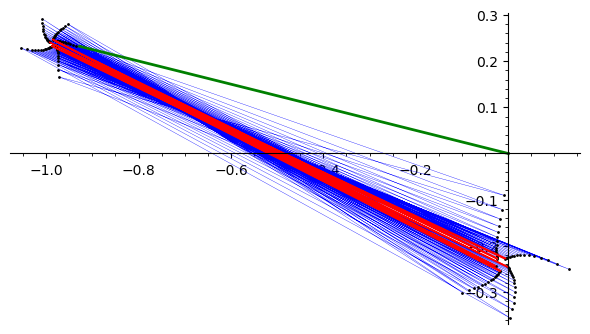

c= -0.927600000000000 + 0.231900000000000*I N= 183 lastN(red)= 20
Critical orbit (start=0)


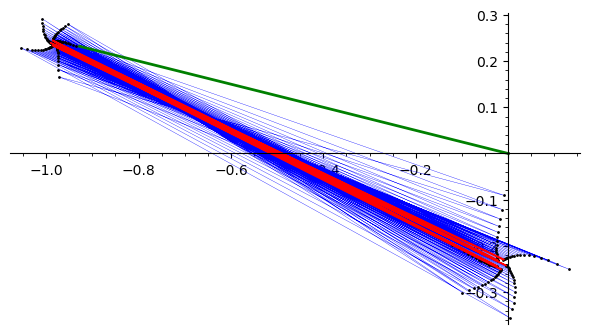

c= -0.927600000000000 + 0.231900000000000*I N= 203 lastN(red)= 20
Critical orbit (start=0)


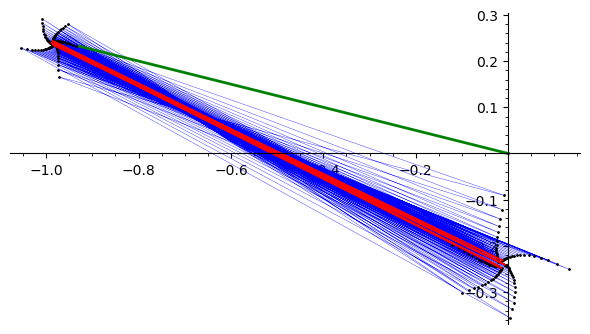

c= -0.927600000000000 + 0.231900000000000*I N= 223 lastN(red)= 20
Critical orbit (start=0)


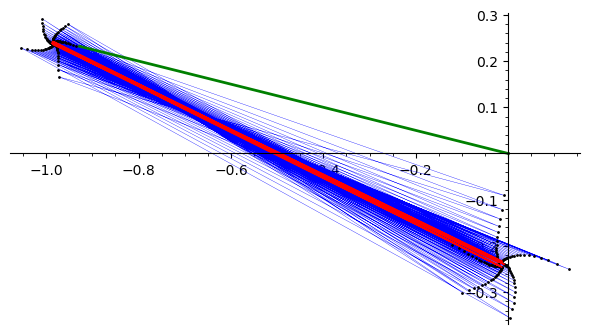

c= -0.927600000000000 + 0.231900000000000*I N= 243 lastN(red)= 20
Critical orbit (start=0)


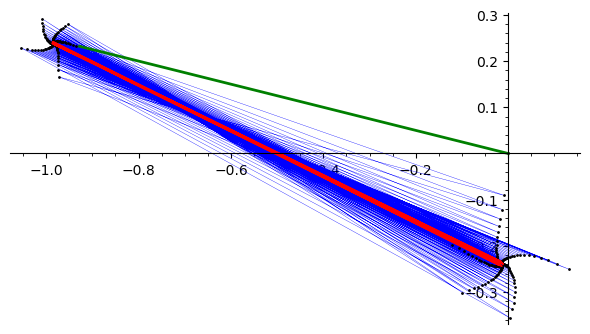

c= -0.927600000000000 + 0.231900000000000*I N= 263 lastN(red)= 20
Critical orbit (start=0)


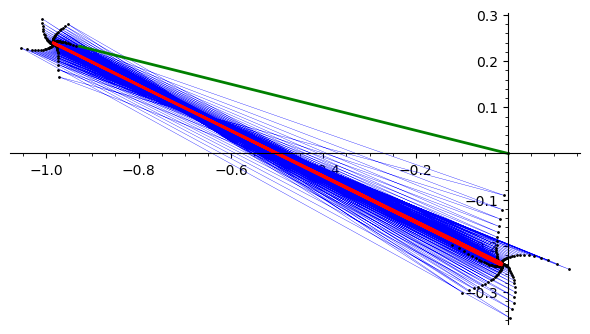

c= -0.927600000000000 + 0.231900000000000*I N= 283 lastN(red)= 20
Critical orbit (start=0)


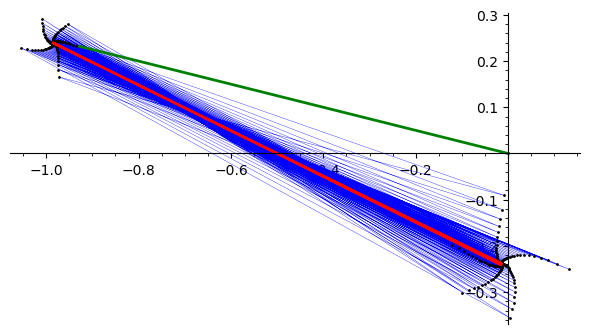

In [41]:
for i in range(3, 300,20):
    complex_orbit(-0.9276+0.2319*I, i, lastN=20)

c= -0.125000000000000 + 0.753300000000000*I N= 4 lastN(red)= 20
Critical orbit (start=0)


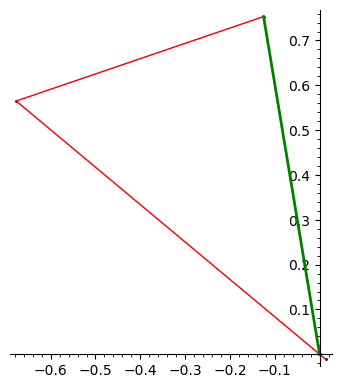

In [42]:
last_plot=complex_orbit(-0.1250+0.7533*I, 4, lastN=20)

c= -0.129900000000000 + 0.570000000000000*I N= 50 lastN(red)= 20
Critical orbit (start=0)


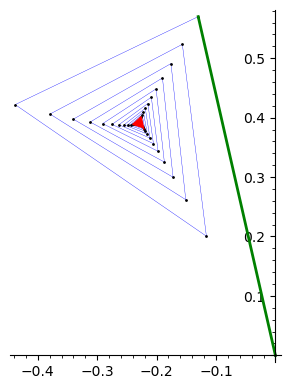

In [43]:
last_plot=complex_orbit(-0.1299+0.57*I, 50, lastN=20)

c= -0.736800000000000 + 0.132000000000000*I N= 60000 lastN(red)= 100
Critical orbit (start=0)


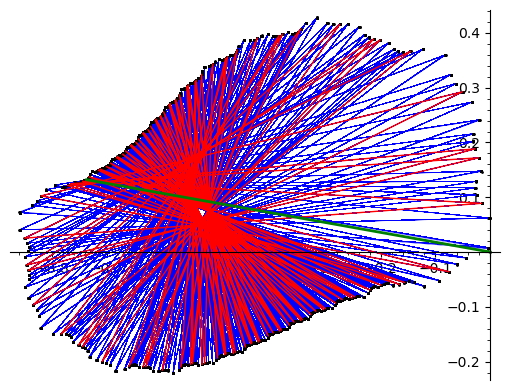

In [44]:
last_plot=complex_orbit(-0.7368+0.132*I, 60000, lastN=100)

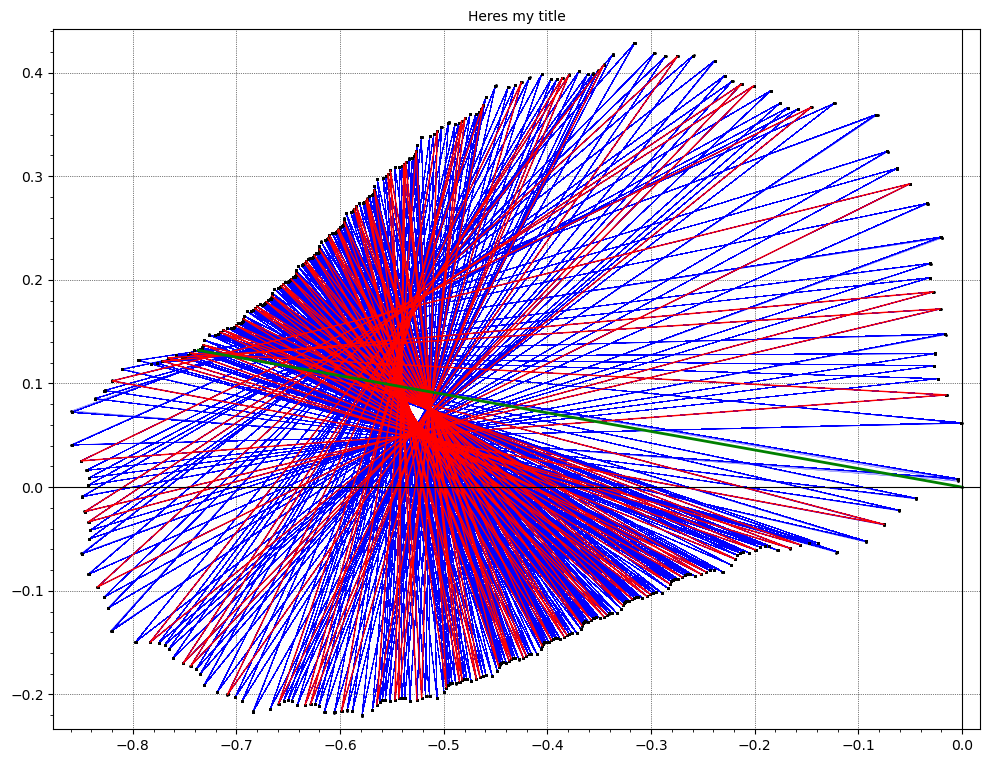

In [45]:
#Graphics.matplotlib?
show(last_plot,title="Heres my title",gridlines=True,frame=True,figsize=[10,10])

c= -0.736800000000000 + 0.131950000000000*I N= 70000 lastN(red)= 51
Critical orbit (start=0)


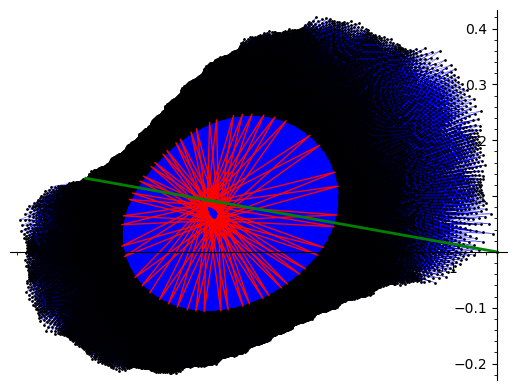

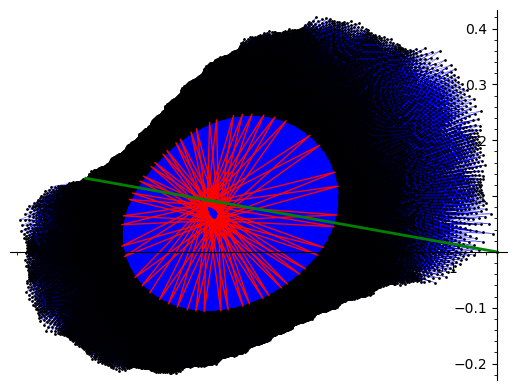

In [46]:
complex_orbit(-0.7368+0.13195*I, 70000, lastN=51)

c= -0.320700000000000 + 0.616850000000000*I N= 112 lastN(red)= 6
Critical orbit (start=0)


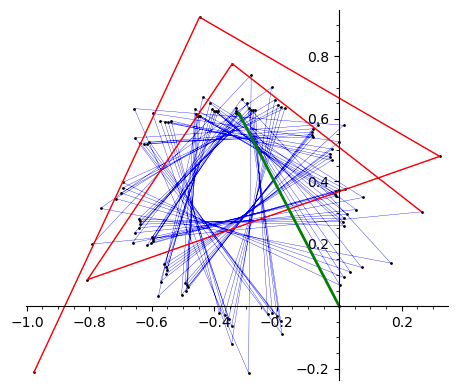

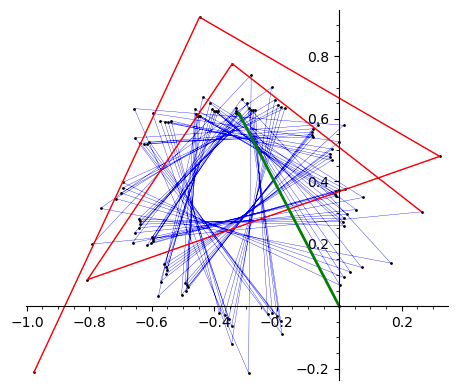

In [47]:
complex_orbit(-0.3207+0.61685*I, 112, lastN=6)

c= -0.368940000000000 + 0.616548000000000*I N= 1000 lastN(red)= 8
Critical orbit (start=0)


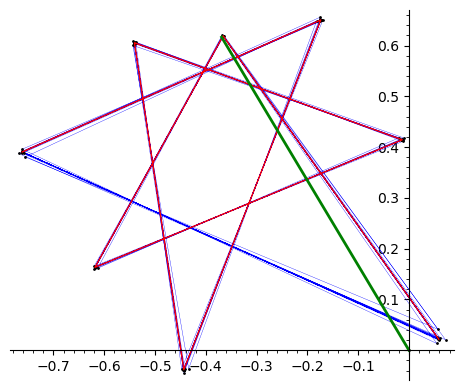

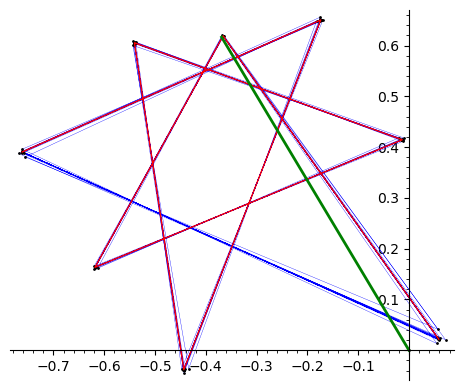

In [48]:
complex_orbit(-0.36894+0.616548*I, 1000, lastN=8)

*Here's a transition Mala suggested to me. We contrast:*

*** convergence (steps=500, 10000) of the critical orbit to a fixed point (c=0.749+0.0001*I, in the blob of index 1), slightly upper left of the pinch point.***

*** with convergence (steps=5000) to a 2-cycle (c=0.7505+0.0001*I, in the index 2 blob). slighty to the upper right of the pinch point.***

Notice how the 500 first steps of the orbit (first plot) which eventually converges to a fixed point (second plot) resembles the orbit that converges to a 2-cycle 

Convergence to a fixed point, only 500 steps
c= -0.749000000000000 + 0.000100000000000000*I N= 500 lastN(red)= 10
Critical orbit (start=0)


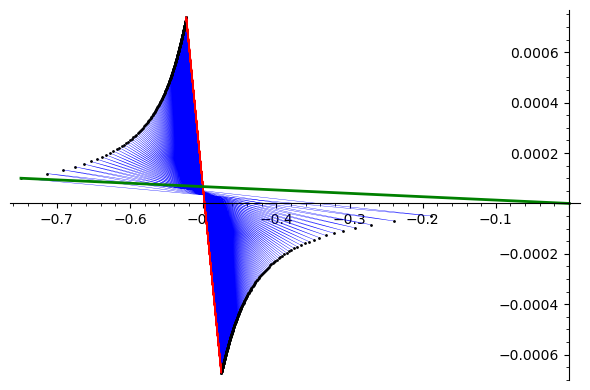

Convergence to a fixed point, after 10,000 steps we're very close
c= -0.749000000000000 + 0.000100000000000000*I N= 10000 lastN(red)= 10
Critical orbit (start=0)


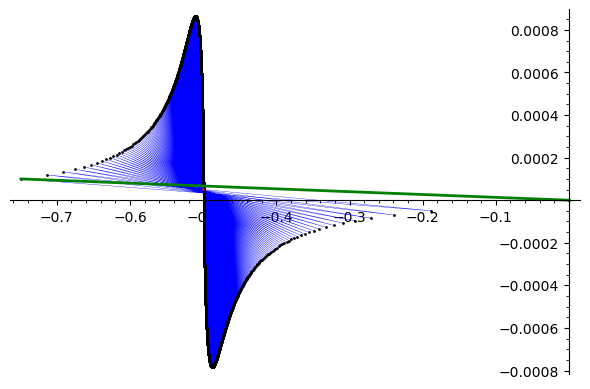

Convergence to a 2-cycle, 5000 steps
c= -0.750500000000000 + 0.000100000000000000*I N= 5000 lastN(red)= 10
Critical orbit (start=0)


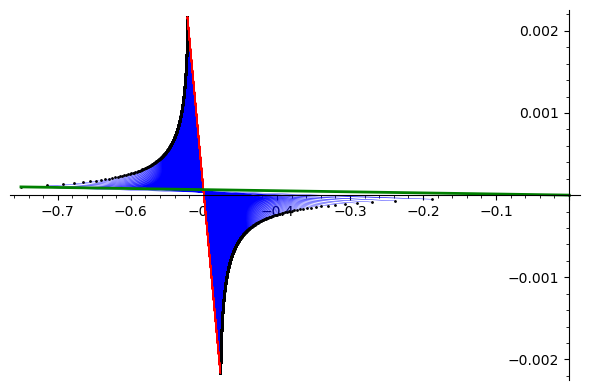

In [49]:
print("Convergence to a fixed point, only 500 steps")
neg3_4ths_minus_500=complex_orbit_arbaspect(-0.749+0.0001*I, 500, lastN=10)
print("Convergence to a fixed point, after 10,000 steps we're very close")
neg3_4ths_minus_5000=complex_orbit_arbaspect(-0.749+0.0001*I, 10000, lastN=10)
print("Convergence to a 2-cycle, 5000 steps")
neg3_4ths_plus =complex_orbit_arbaspect(-0.7505+0.0001*I, 5000, lastN=10)

c= -1.75000000000000 + 0.0100000000000000*I N= 20000 lastN(red)= 13
Critical orbit (start=0)


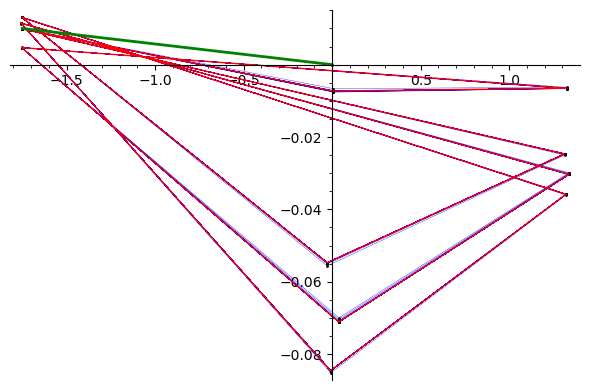

In [50]:
last_plot=complex_orbit_arbaspect(-1.75+0.01*I, 20000, lastN=13)
#period 12


c= -1.75000000000000 + 0.00934013400000000*I N= 20000 lastN(red)= 13
Critical orbit (start=0)


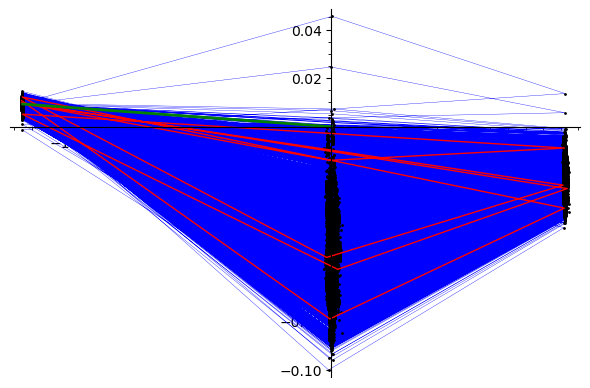

In [51]:
next_plot=complex_orbit_arbaspect(-1.75+0.009340134*I, 20000, lastN=13)
#wilder period 12

c= -1.75045300000000 + 0.00984500000000000*I N= 20000 lastN(red)= 13
Critical orbit (start=0)


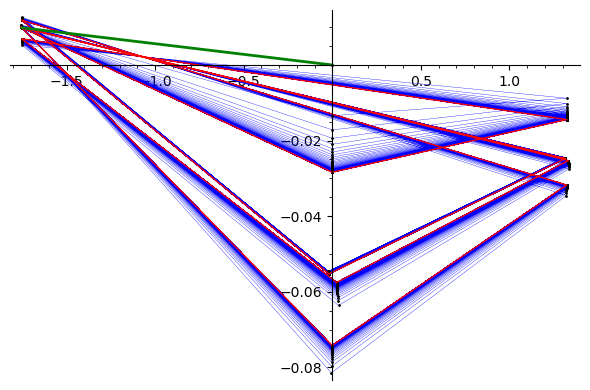

c= -1.75005540000000 + 0.00928600000000000*I N= 20000 lastN(red)= 13
Critical orbit (start=0)


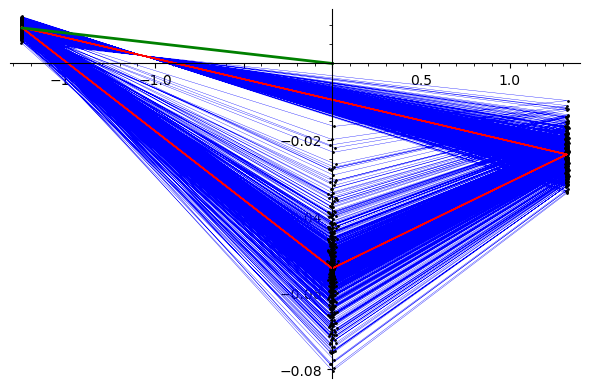

In [52]:
per12=complex_orbit_arbaspect(-1.750453  + 0.009845*I, 20000, lastN=13)
per3 =complex_orbit_arbaspect(-1.7500554 + 0.009286*I, 20000, lastN=13)


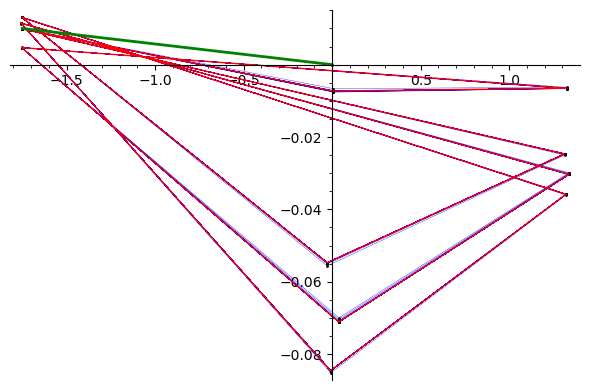

c= -1.57611018900000 + 7.96500000000000e-6*I N= 30 lastN(red)= 5
Critical orbit (start=0)


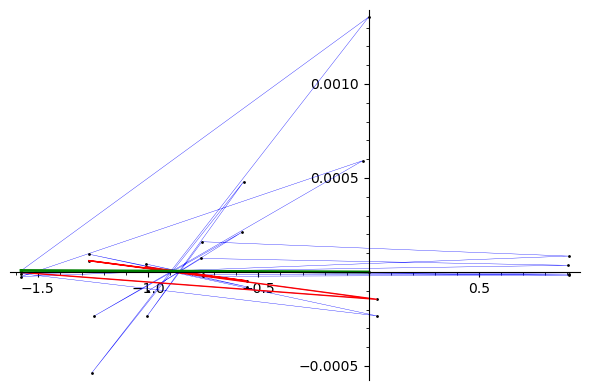

In [53]:
show(last_plot)
saved_plot=complex_orbit_arbaspect(-1.576110189+0.000007965*I, 30, lastN=5)

c= -1.77360000000000 - 0.0000200000000000000*I N= 1000 lastN(red)= 13
Critical orbit (start=0)


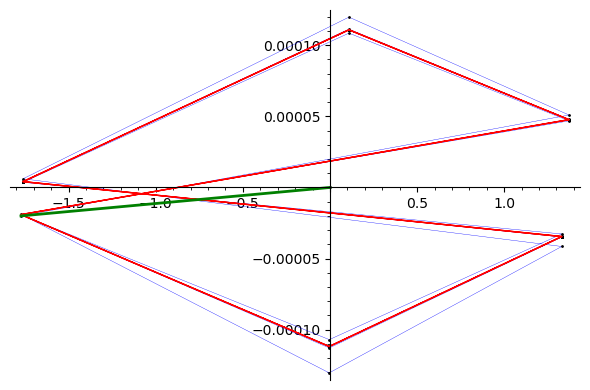

c= -1.77360000000000 - 0.0000100000000000000*I N= 1000 lastN(red)= 13
Critical orbit (start=0)


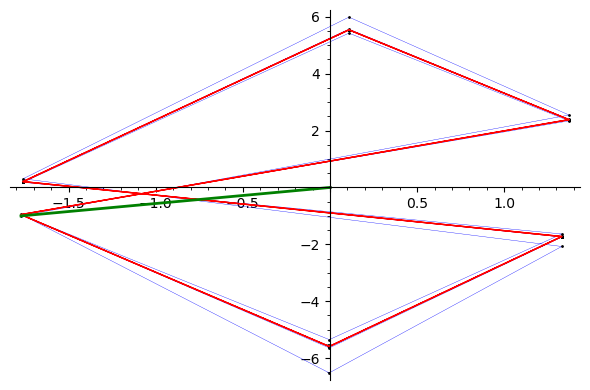

c= -1.77360000000000 - 5.00000000000000e-6*I N= 1000 lastN(red)= 13
Critical orbit (start=0)


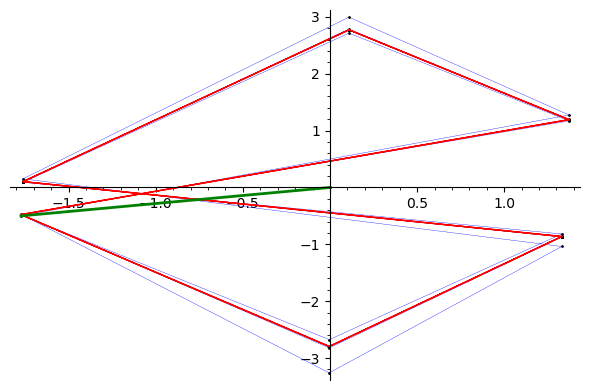

In [54]:
complex_orbit_arbaspect(-1.7736-0.00002*I, 1000, lastN=13)
complex_orbit_arbaspect(-1.7736-0.00001*I, 1000, lastN=13)
complex_orbit_arbaspect(-1.7736-0.000005*I, 1000, lastN=13)
pass

c= -1.54277510640000 + 4.22300000000000e-7*I N= 60000 lastN(red)= 150
Critical orbit (start=0)


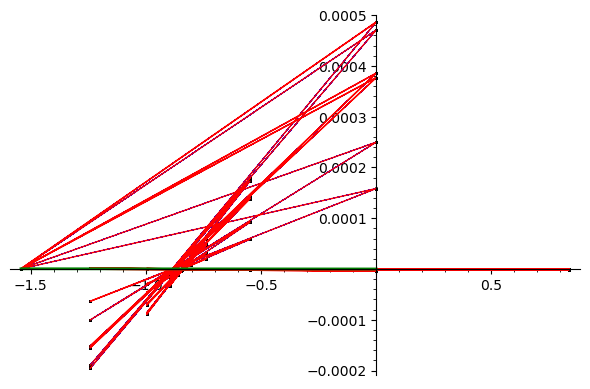

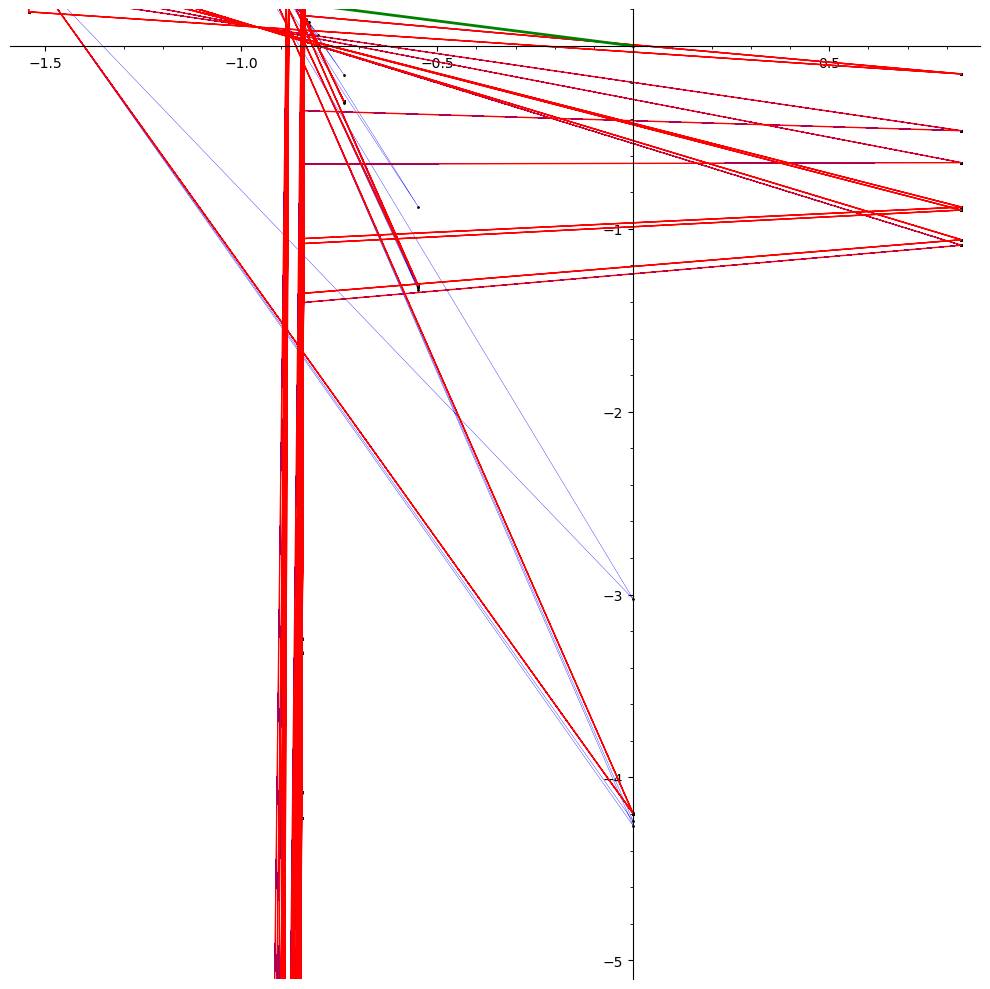

In [55]:
p=complex_orbit_arbaspect(-1.5427751064+0.0000004223*I, 60000, lastN=150)
show(p,figsize=[10,10],ymin=-0.000005,ymax=0.0000001)

c= -1.54277511830000 + 4.29100000000000e-7*I N= 100000 lastN(red)= 99
Critical orbit (start=0)


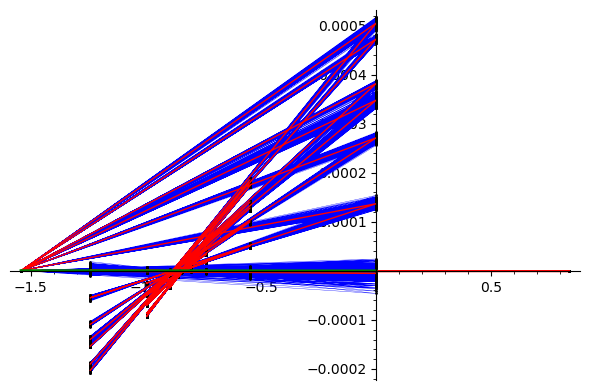

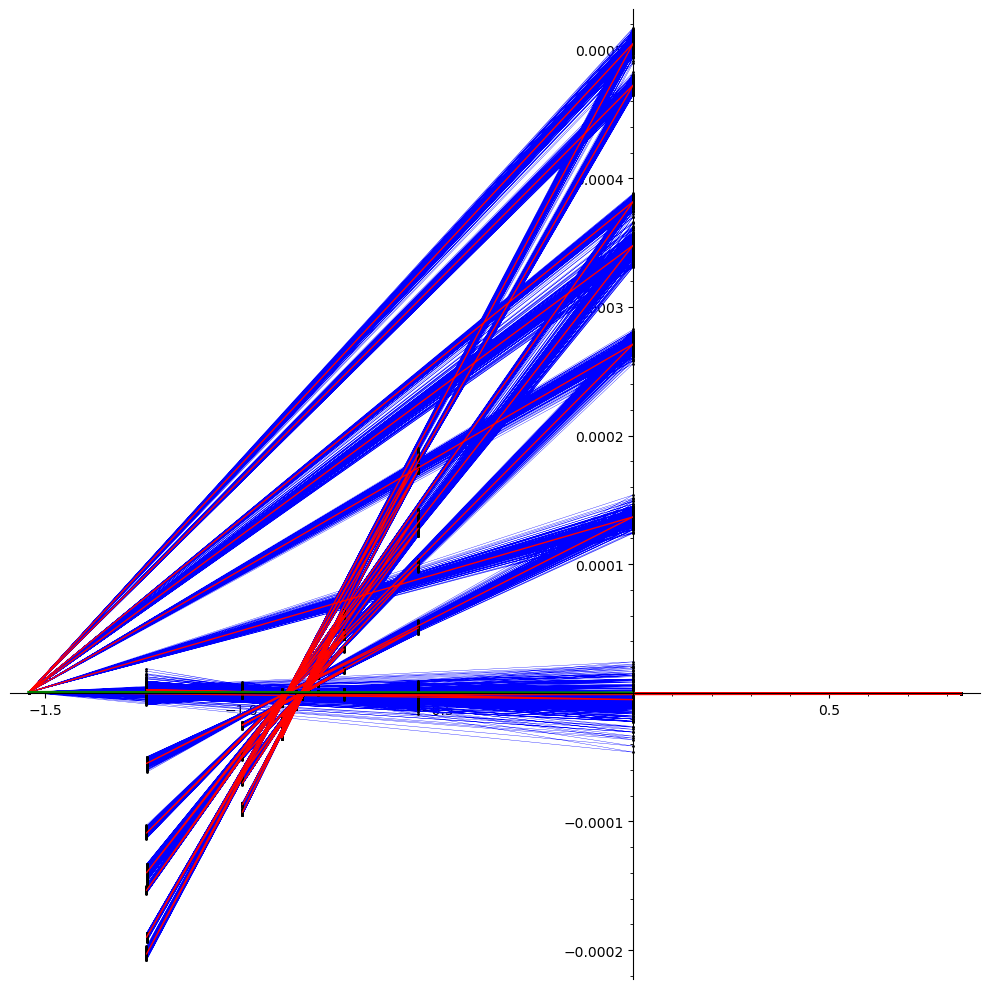

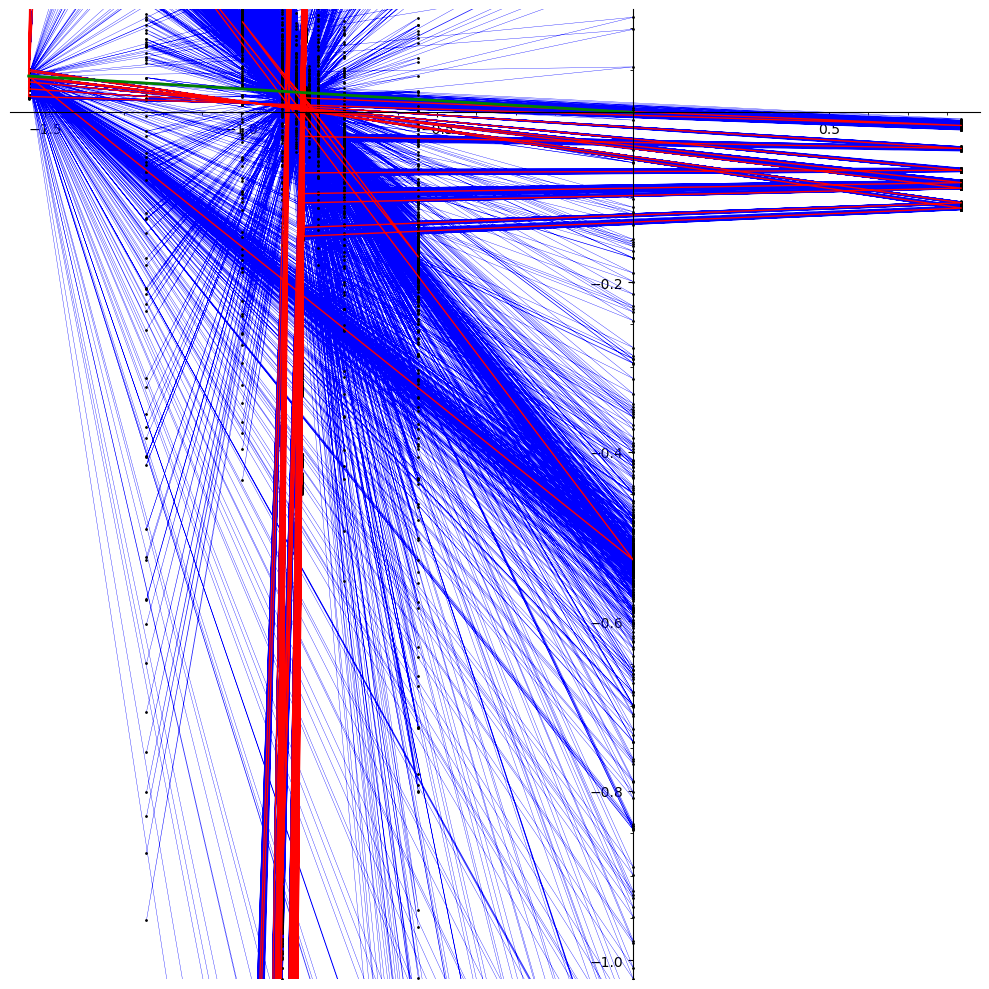

In [56]:
p=complex_orbit_arbaspect(-1.5427751183+0.0000004291*I, 100000, lastN=99)
show(p,figsize=[10,10])
show(p,figsize=[10,10],ymin=-0.00001,ymax=0.000001)

c= -1.54277570550000 + 1.27000000000000e-7*I N= 3855 lastN(red)= 50
Critical orbit (start=0)


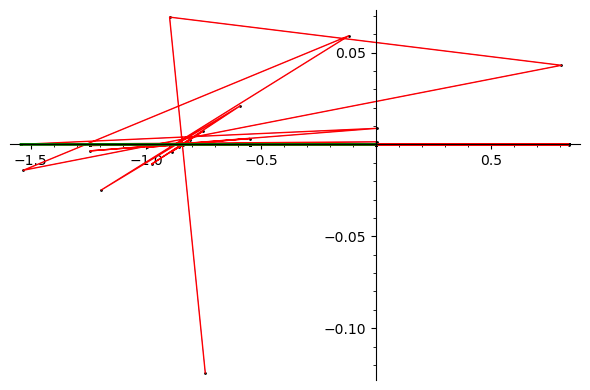

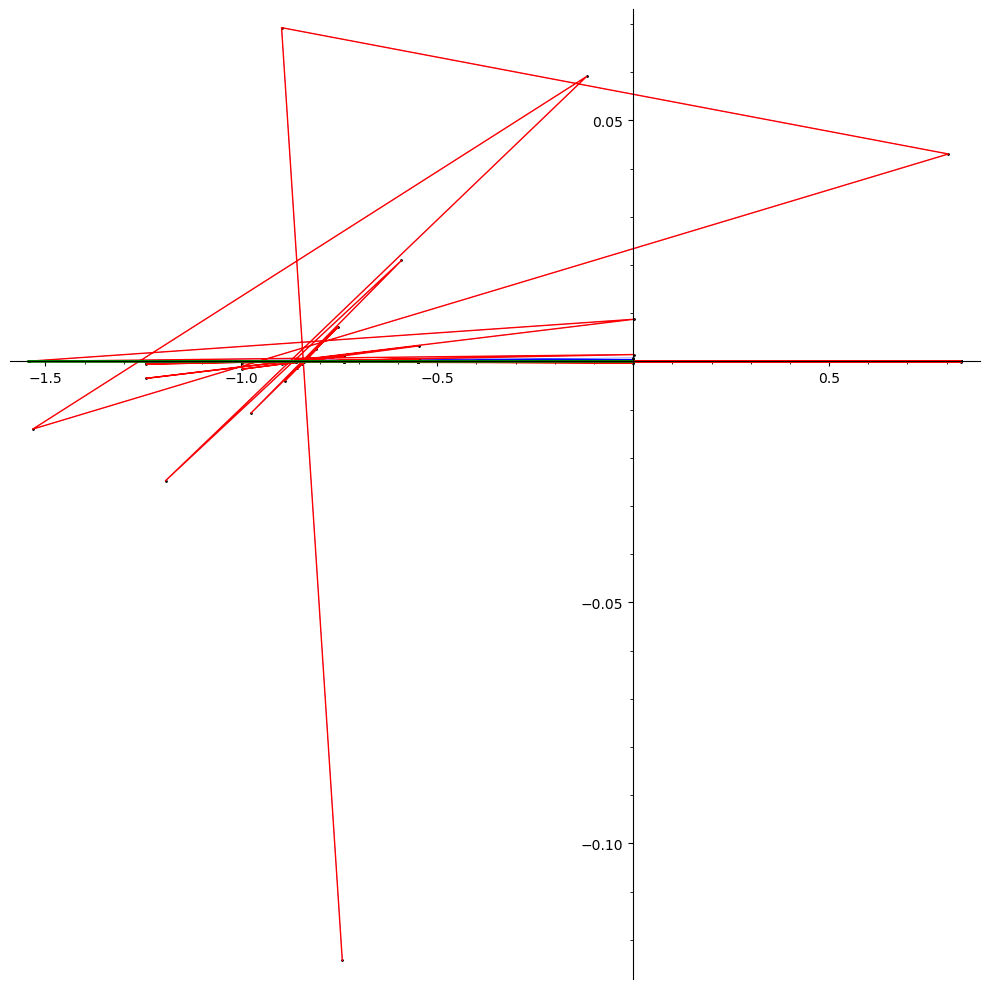

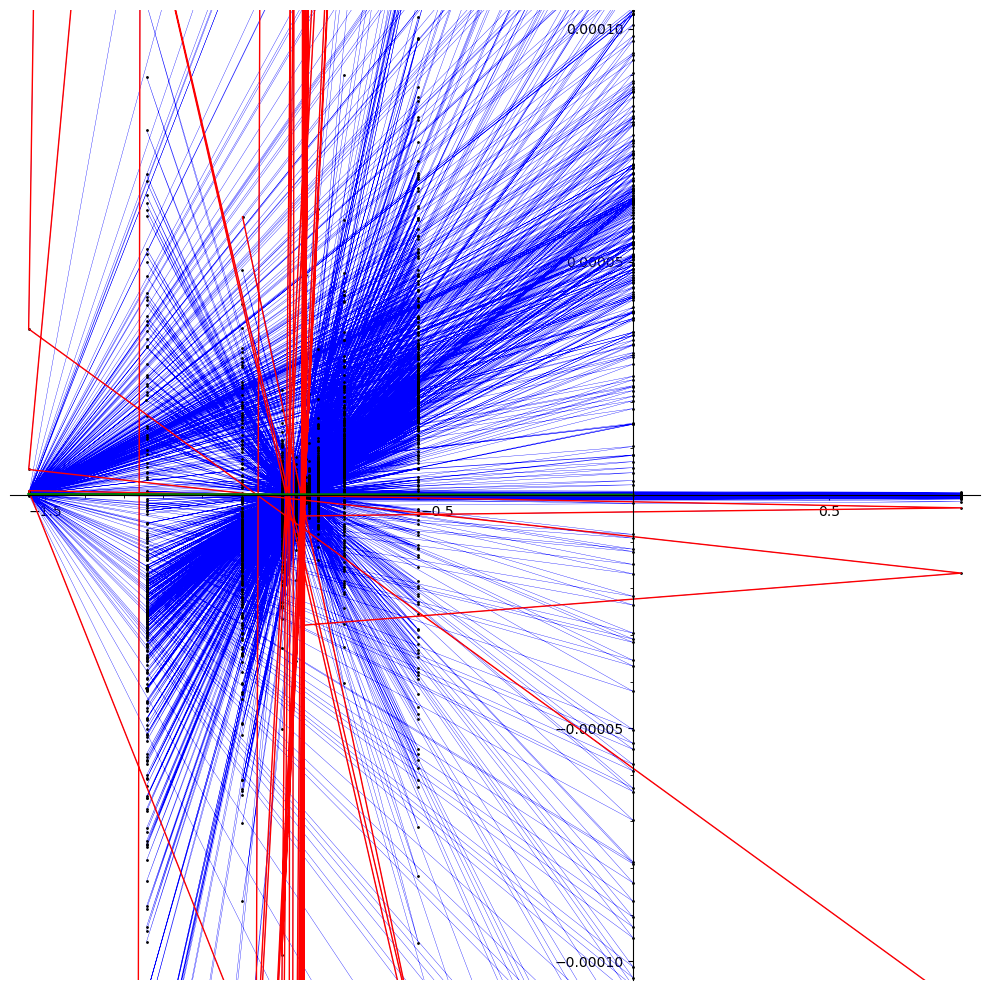

In [57]:
p=complex_orbit_arbaspect(-1.5427757055+0.0000001270*I, 3855, lastN=50)
show(p,figsize=[10,10])
show(p,figsize=[10,10],ymin=-0.0001,ymax=0.0001)

c= -0.217525800000000 + 1.11445340000000*I N= 30 lastN(red)= 7
Critical orbit (start=0)


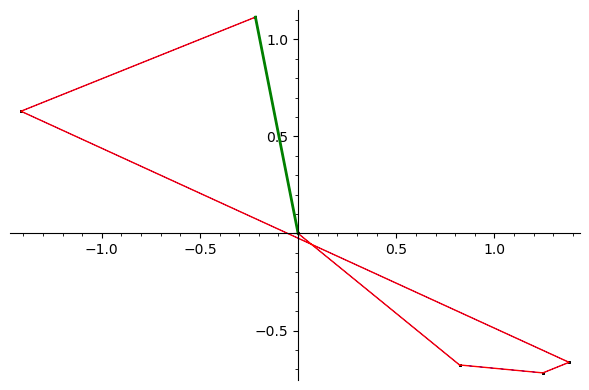

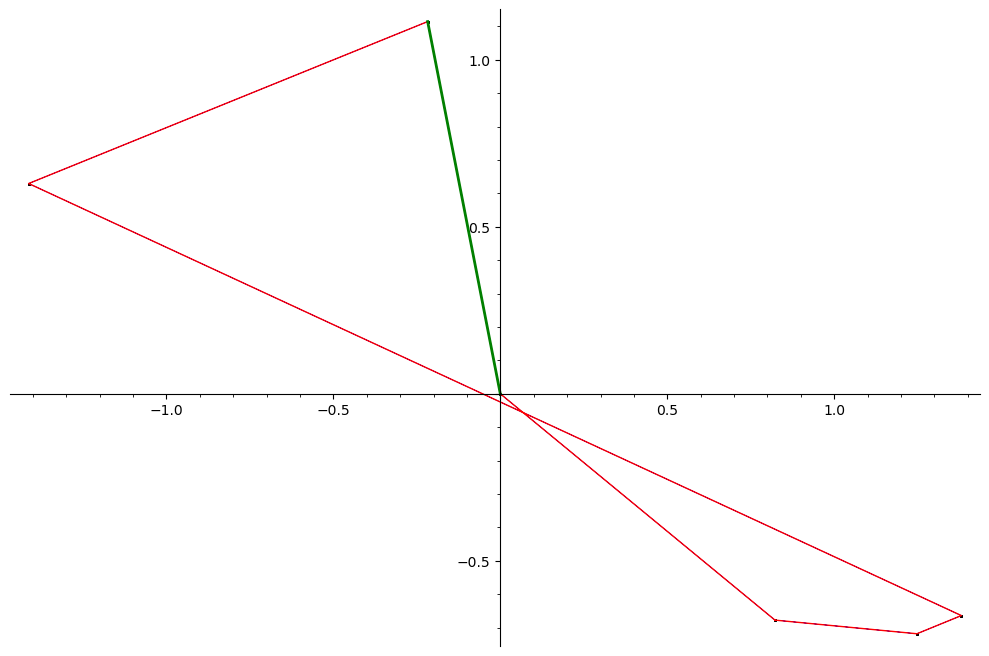

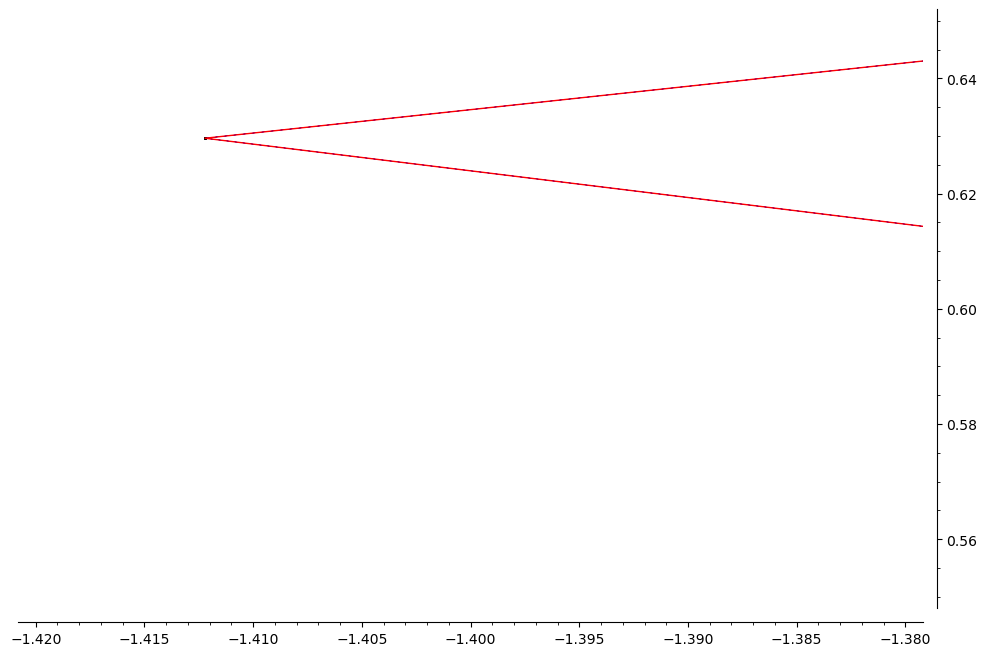

In [58]:
p=complex_orbit_arbaspect(-0.2175258+01.11445340*I, 30, lastN=7)
show(p,figsize=10)
show(p,figsize=10,xmin=-1.42,xmax=-1.38,ymin=0.55,ymax=0.65)

c= -0.217490818000000 + 1.11445340000000*I N= 379 lastN(red)= 7
Critical orbit (start=0)
Escaping! Stop Iteration= 377  z= 15.3221465638477 + 4.62029756592876*I


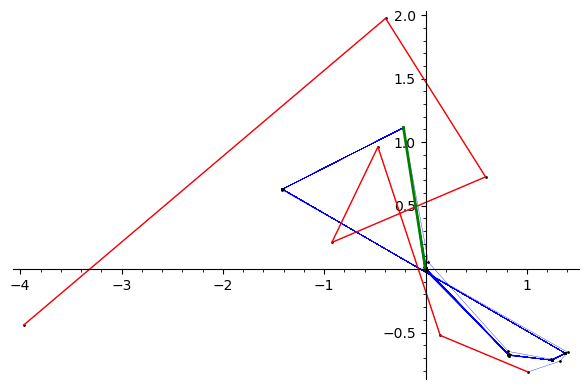

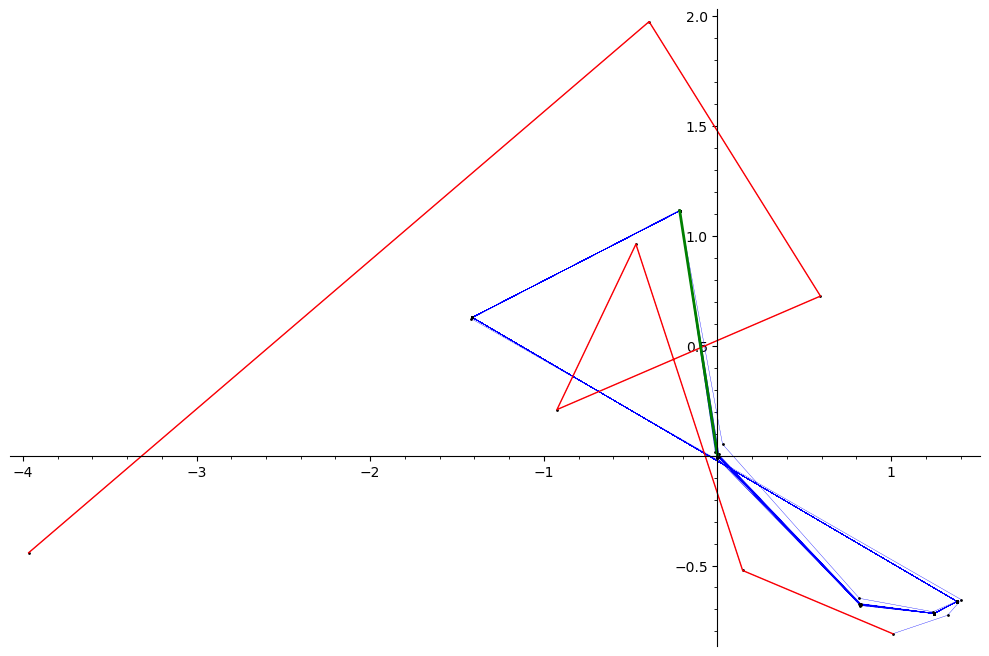

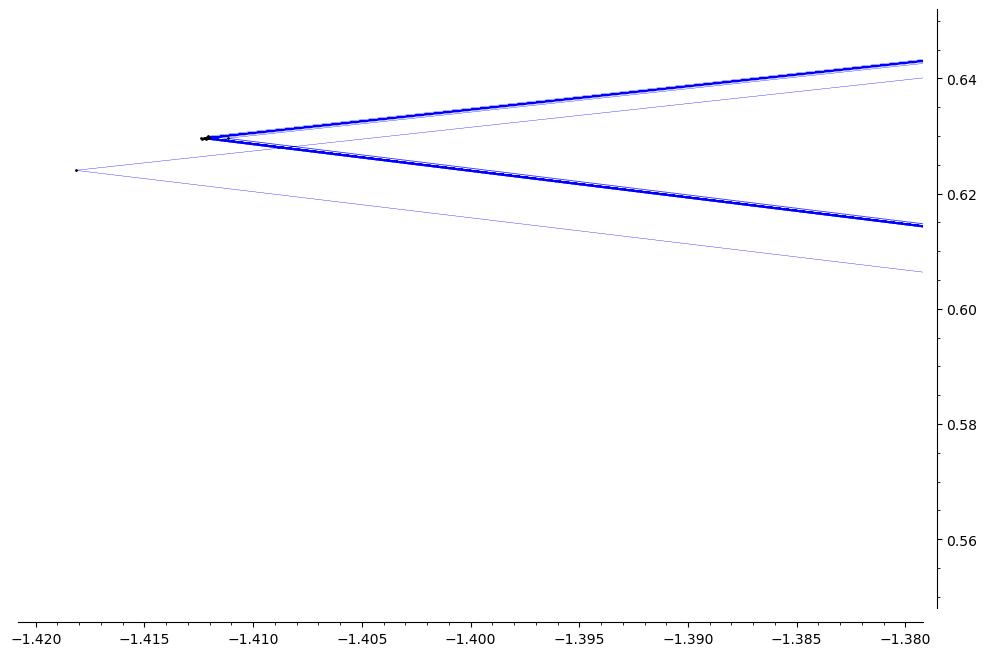

In [59]:
#p=complex_orbit_arbaspect(-0.2175258+01.11445340*I, 60, lastN=7)
p=complex_orbit_arbaspect(-0.2175258+0.000034982+01.11445340*I, 379, lastN=7)
show(p,figsize=10)
show(p,figsize=10,xmin=-1.42,xmax=-1.38,ymin=0.55,ymax=0.65)

c= -0.217574500000000 + 1.11445340000000*I N= 174 lastN(red)= 7
Critical orbit (start=0)
Escaping! Stop Iteration= 172  z= 0.557729846828876 - 11.0429696909068*I


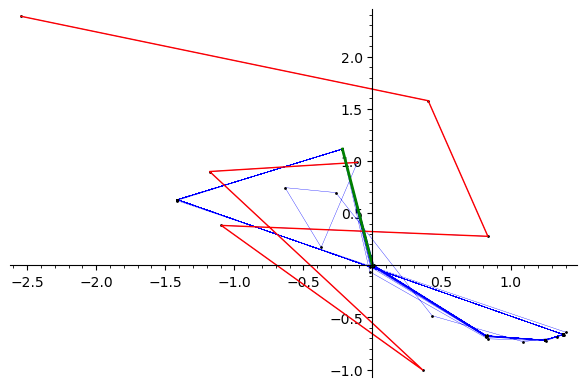

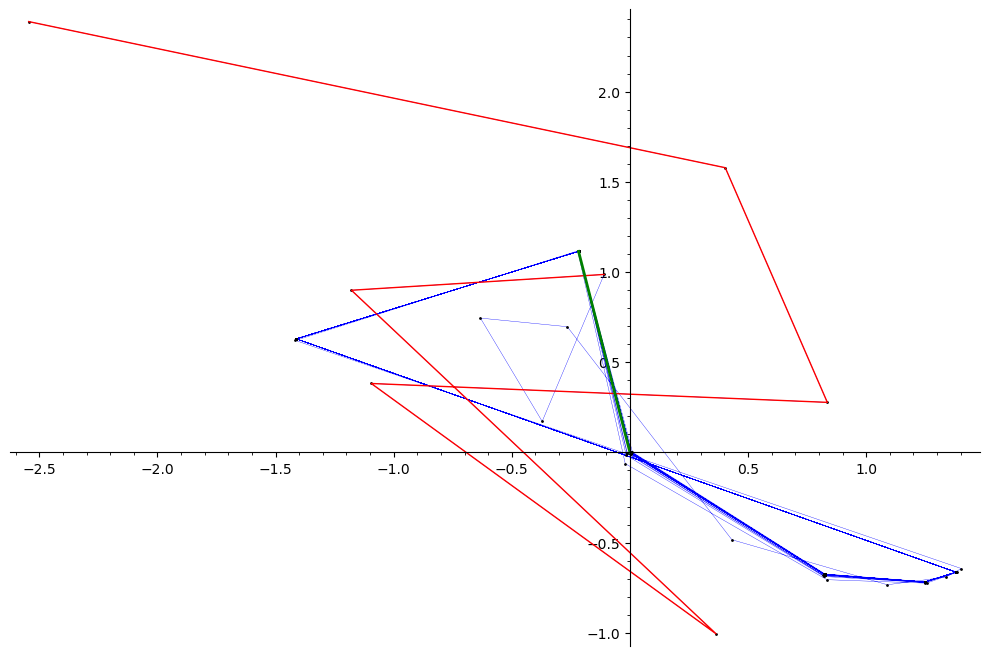

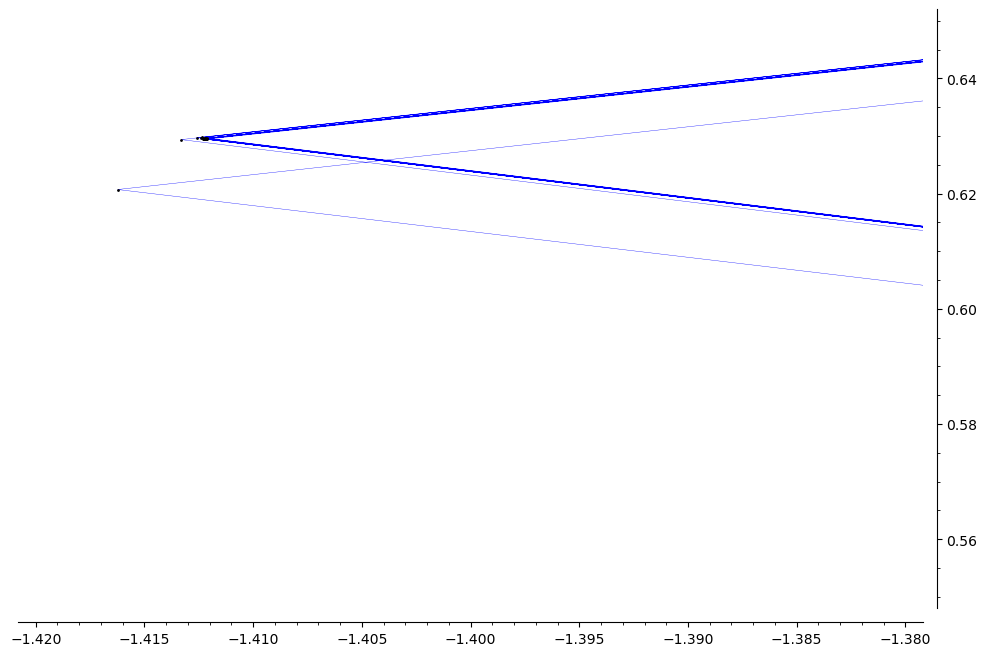

In [60]:
p=complex_orbit_arbaspect(-0.2175258-0.0000487+01.11445340*I, 174, lastN=7)
show(p,figsize=10)
show(p,figsize=10,xmin=-1.42,xmax=-1.38,ymin=0.55,ymax=0.65)

c= -0.217490818000000 + 1.11445340000000*I N= 379 lastN(red)= 7
Critical orbit (start=0)
Escaping! Stop Iteration= 377  z= 15.3221465638477 + 4.62029756592876*I


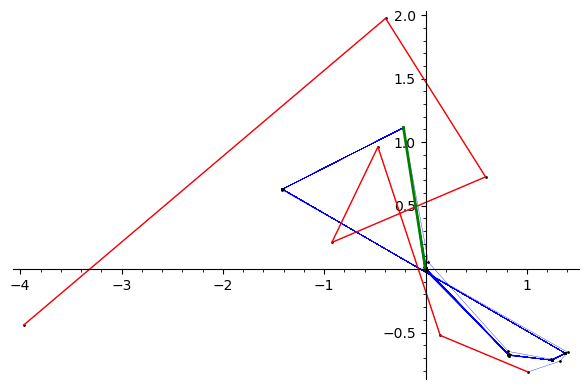

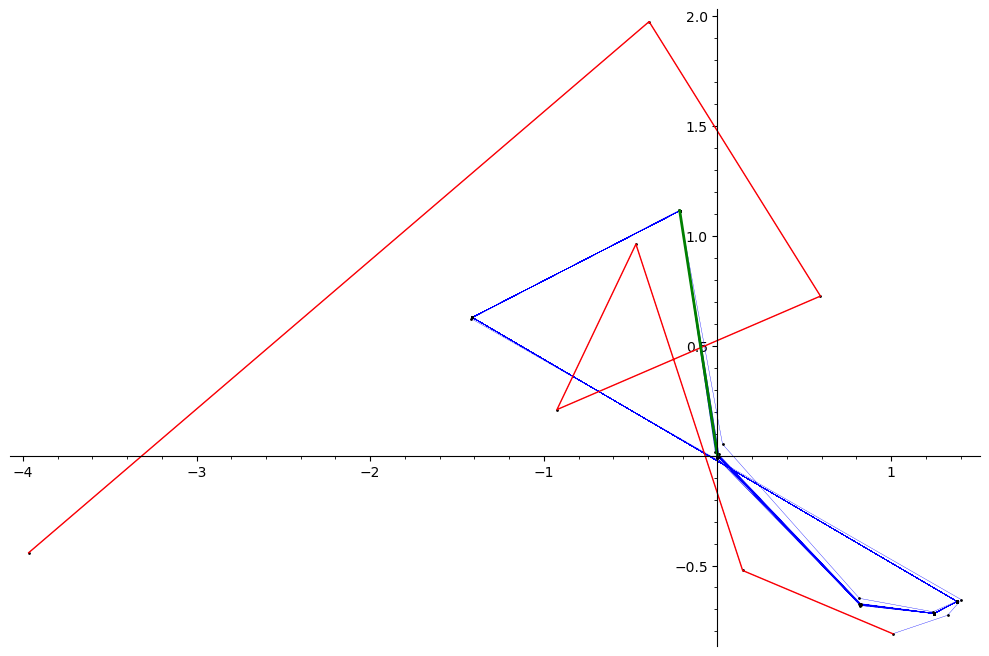

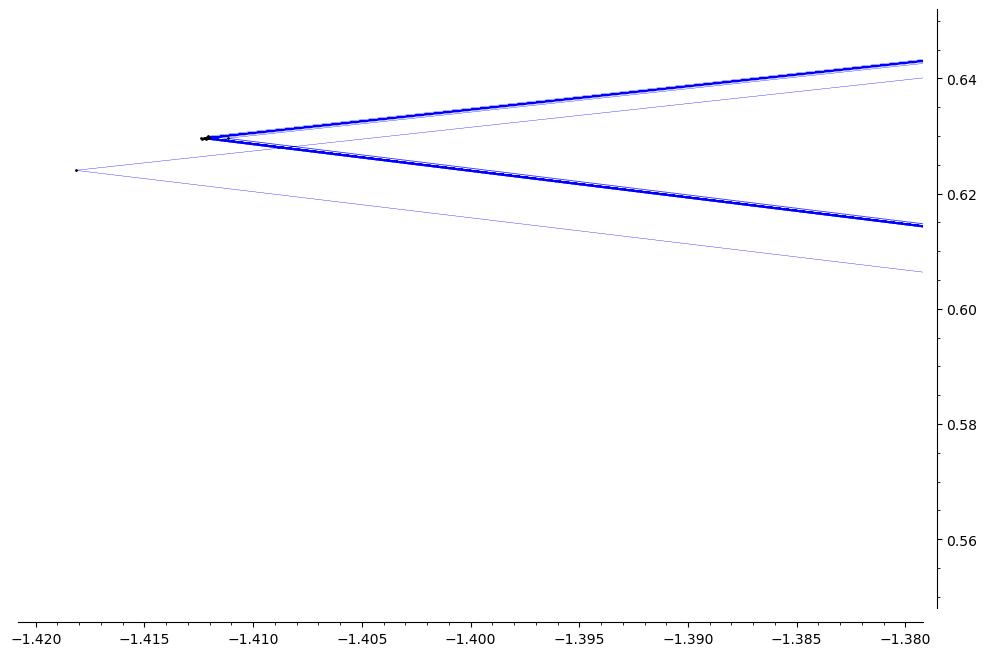

In [61]:
p=complex_orbit_arbaspect(-0.2175258+0.000034982+01.11445340*I, 379, lastN=7)
show(p,figsize=10)
show(p,figsize=10,xmin=-1.42,xmax=-1.38,ymin=0.55,ymax=0.65)

c= -0.0450000000000000 + 0.987000000000000*I N= 1000 lastN(red)= 7
Critical orbit (start=0)


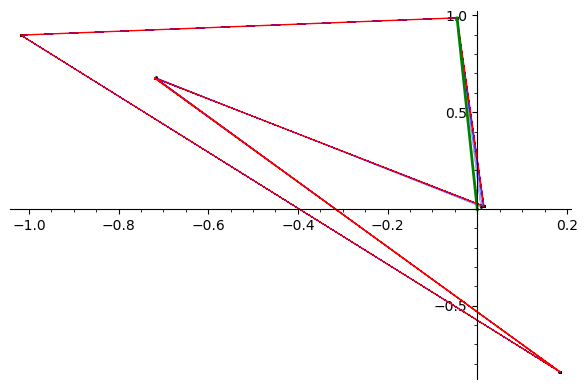

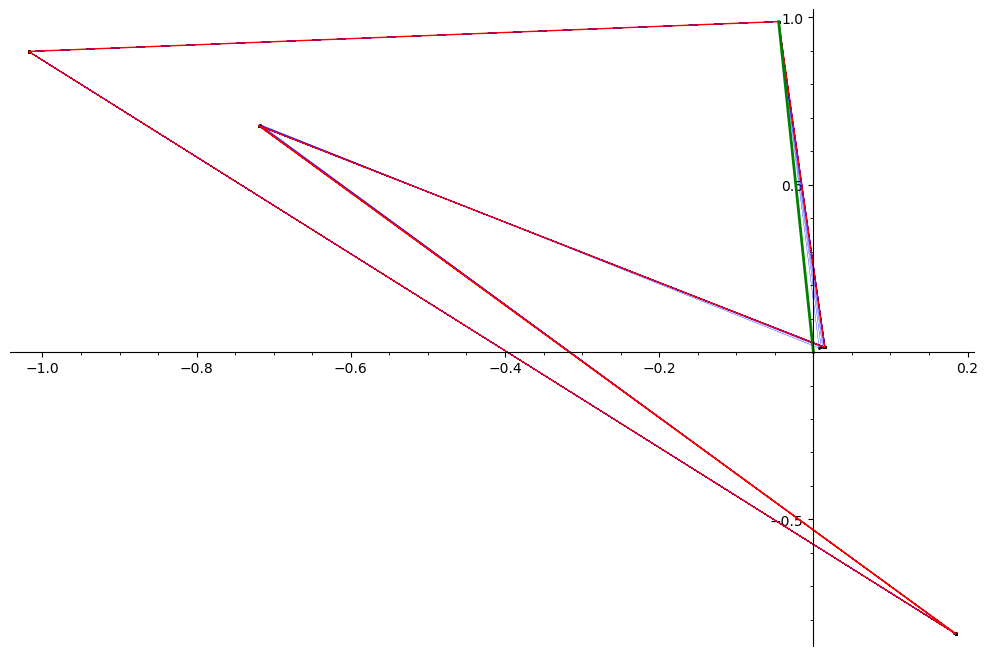

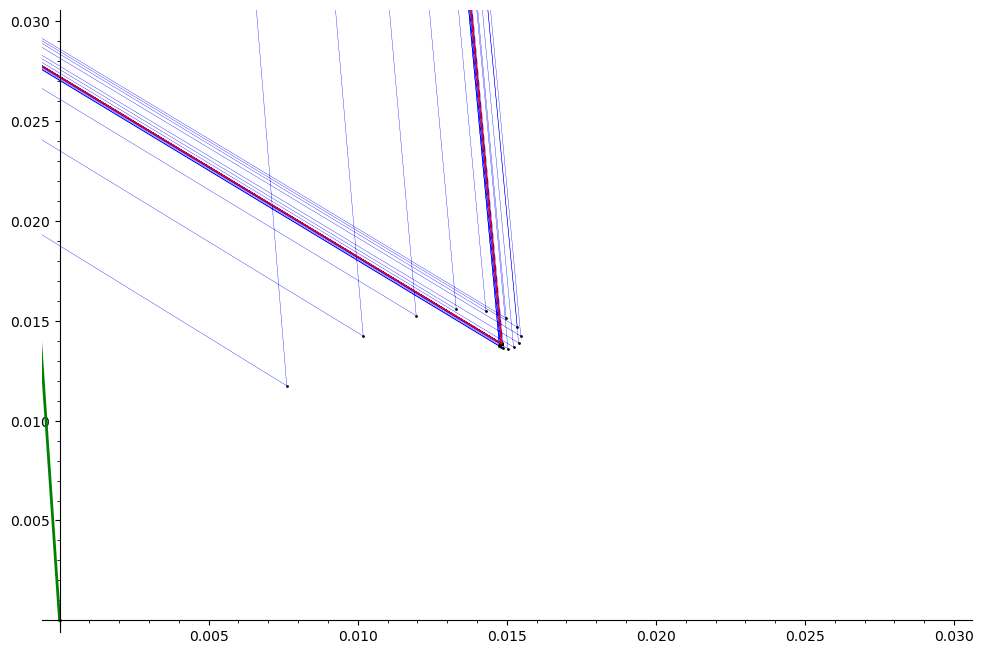

In [62]:
p=complex_orbit_arbaspect(-0.045+0.987*I, 1000, lastN=7)
show(p,figsize=10)
show(p,figsize=10,xmin=0.0,xmax=0.03,ymin=0.00,ymax=0.03)

c= -0.0416510000000000 + 0.987000000000000*I N= 1000 lastN(red)= 30
Critical orbit (start=0)


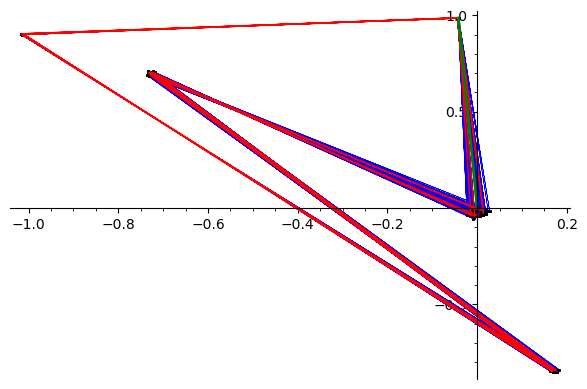

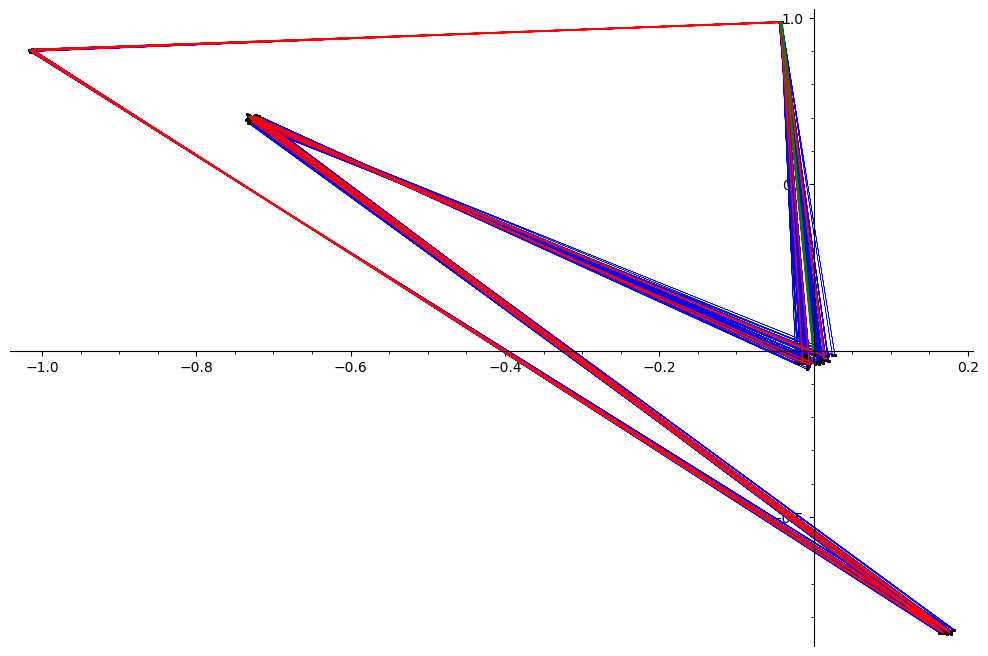

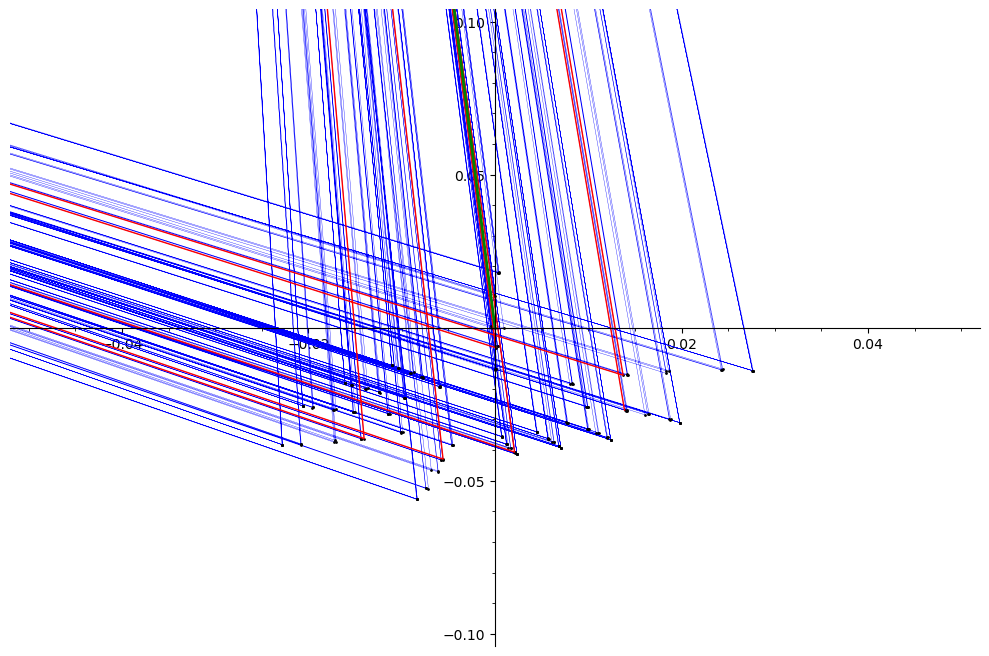

In [63]:
p=complex_orbit_arbaspect(-0.045+0.0033490 +0.987*I, 1000, lastN=30)
show(p,figsize=10)
show(p,figsize=10,xmin=-0.05,xmax=0.05,ymin=-0.100,ymax=0.1)

c= -0.0450000000000000 + 0.987000000000000*I N= 30 lastN(red)= 7
Critical orbit (start=0)


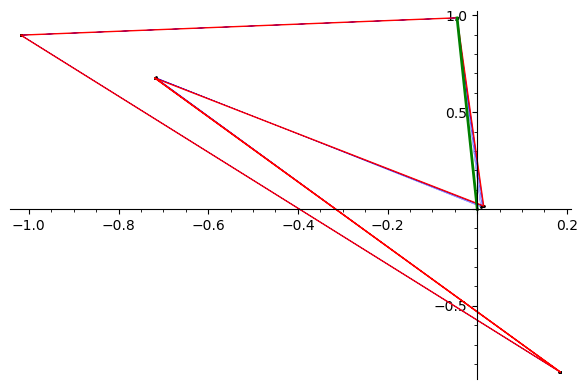

c= -0.217525800000000 + 1.11445340000000*I N= 30 lastN(red)= 7
Critical orbit (start=0)


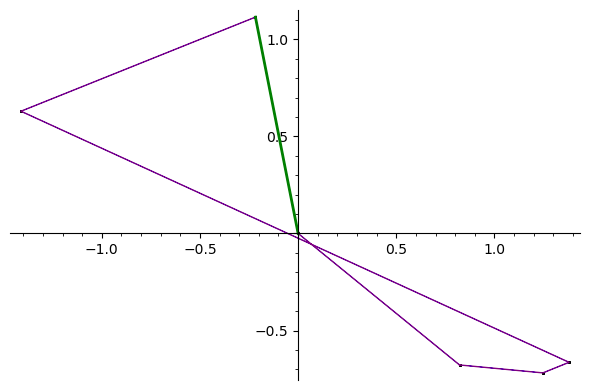

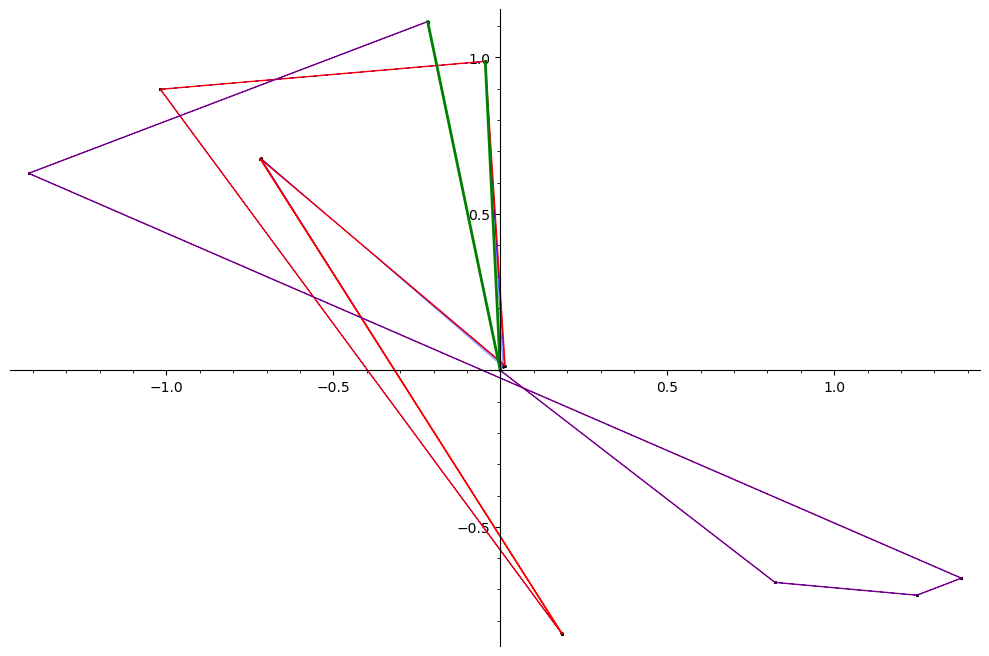

In [64]:
p=complex_orbit_arbaspect(-0.045+0.987*I, 30, lastN=7)
q=complex_orbit_arbaspect(-0.2175258+01.11445340*I, 30, lastN=7,lastcolor="purple")
show(p+q,figsize=10)

c= -0.0451000000000000 + 0.987100000000000*I N= 50000 lastN(red)= 7
Critical orbit (start=0)


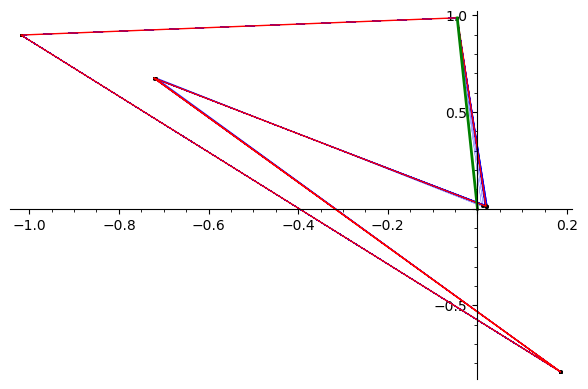

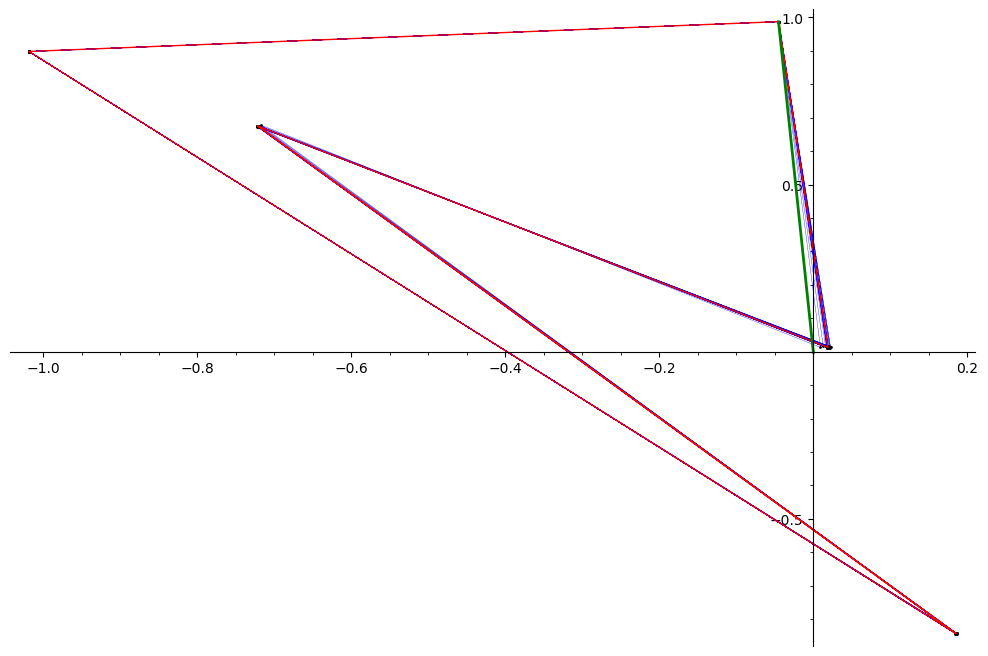

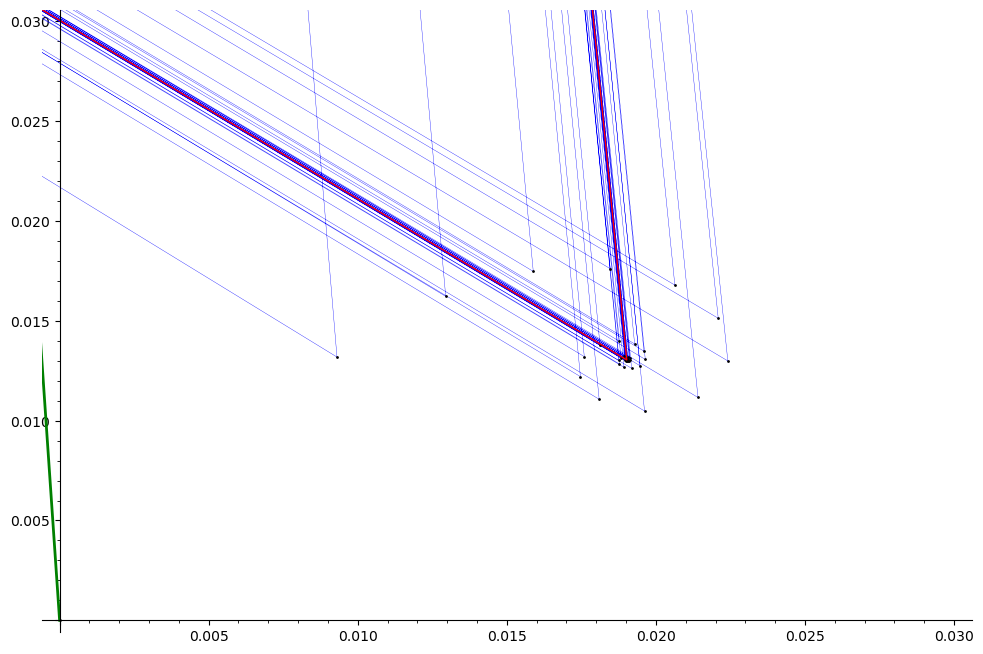

In [65]:
p=complex_orbit_arbaspect(-0.045-0.0001+(0.987+0.0001)*I, 50000, lastN=7)
show(p,figsize=10)
show(p,figsize=10,xmin=0.0,xmax=0.03,ymin=0.00,ymax=0.03)

c= -0.0442123577040703 + 0.986580976280894*I N= 200 lastN(red)= 7
Critical orbit (start=0)


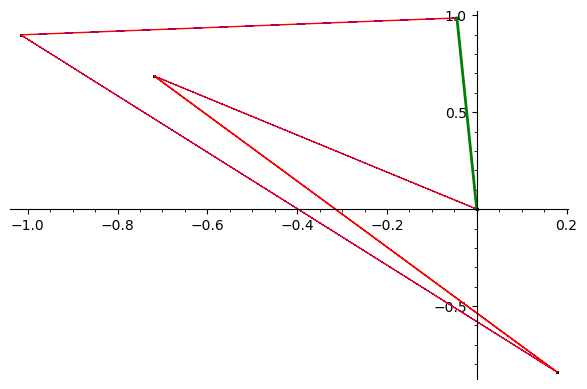

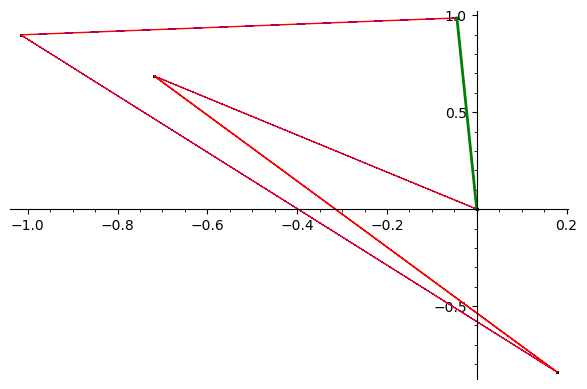

In [66]:
complex_orbit_arbaspect((-0.04421235770407029 + 0.9865809762808941*I), 200, lastN=7)

c= -0.0402123577040703 + 0.986580976280894*I N= 200 lastN(red)= 7
Critical orbit (start=0)


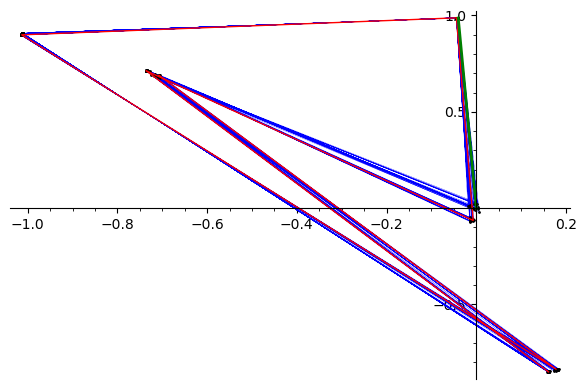

In [67]:
p=complex_orbit_arbaspect((-0.04421235770407029 + 0.004 + 0.9865809762808941*I), 200, lastN=7)